
## 3D-CNN Implementation

## (i) Importing the necessary packages

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout, ReLU, \
                         Conv2D, Conv3D, BatchNormalization, \
                         MaxPooling2D,MaxPooling3D,Reshape,Add
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import os
from sklearn.model_selection import KFold, StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## (ii) Preparing the dataset for model training

### load data

In [ ]:
## directory
directory = '/content/drive/My Drive/Colab Notebooks/'

## Loading the numpy arrays corresponding to the EEG dataset
X_test = np.load(directory + 'X_test.npy')
y_test = np.load(directory + 'y_test.npy')
person_train_valid = np.load(directory + 'person_train_valid.npy')
X_train_valid = np.load(directory + 'X_train_valid.npy')
y_train_valid = np.load(directory + 'y_train_valid.npy')
person_test = np.load(directory + 'person_test.npy')

## Printing the shapes of the numpy arrays
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### EMD Data Preparation and Visualization

#### Create and Save EMD data (expect long runtime: 6-24 hours) 

In [ ]:
#!pip install emd

In [ ]:
# X_train_valid_imf1 = np.zeros((X_train_valid.shape))
# X_train_valid_imf2 = np.zeros((X_train_valid.shape))
# X_train_valid_imf3 = np.zeros((X_train_valid.shape))
# X_train_valid_imf4 = np.zeros((X_train_valid.shape))
# X_test_imf1 = np.zeros((X_test.shape))
# X_test_imf2 = np.zeros((X_test.shape))
# X_test_imf3 = np.zeros((X_test.shape))
# X_test_imf4 = np.zeros((X_test.shape))

# sample_rate = 250
# max_imfs = 4

# num_data = 2115
# for j in np.arange(0,num_data):
#   for i in np.arange(22):
#     emdX = X_train_valid[j,i,:]
#     imf = np.zeros((emdX.shape[0], max_imfs))
#     imf = emd.sift.iterated_mask_sift(emdX, sample_rate=sample_rate, max_imfs=max_imfs)
#     X_train_valid_imf1[j,i,:] = imf[:,0]
#     X_train_valid_imf2[j,i,:] = imf[:,1]
#     X_train_valid_imf3[j,i,:] = imf[:,2]
#     X_train_valid_imf4[j,i,:] = imf[:,3]
# num_data = 443
# for j in np.arange(0,num_data):
#   for i in np.arange(22):
#     emdX = X_test[j,i,:]
#     imf = np.zeros((emdX.shape[0], max_imfs))
#     imf = emd.sift.iterated_mask_sift(emdX, sample_rate=sample_rate, max_imfs=max_imfs)
#     X_test_imf1[j,i,:] = imf[:,0]
#     X_test_imf2[j,i,:] = imf[:,1]
#     X_test_imf3[j,i,:] = imf[:,2]
#     X_test_imf4[j,i,:] = imf[:,3]

# np.save("/content/drive/My Drive/Colab Notebooks/X_train_valid_imf1.npy", X_train_valid_imf1)
# np.save("/content/drive/My Drive/Colab Notebooks/X_train_valid_imf2.npy", X_train_valid_imf2)
# np.save("/content/drive/My Drive/Colab Notebooks/X_train_valid_imf3.npy", X_train_valid_imf3)
# np.save("/content/drive/My Drive/Colab Notebooks/X_train_valid_imf4.npy", X_train_valid_imf4)
# np.save("/content/drive/My Drive/Colab Notebooks/X_test_imf1.npy", X_test_imf1)
# np.save("/content/drive/My Drive/Colab Notebooks/X_test_imf2.npy", X_test_imf2)
# np.save("/content/drive/My Drive/Colab Notebooks/X_test_imf3.npy", X_test_imf3)
# np.save("/content/drive/My Drive/Colab Notebooks/X_test_imf4.npy", X_test_imf4)

#### FFT imf data

In [ ]:
# X_train_valid_imf1 = np.load("/content/drive/My Drive/Colab Notebooks/X_train_valid_imf1.npy")
# X_train_valid_imf2 = np.load("/content/drive/My Drive/Colab Notebooks/X_train_valid_imf2.npy")
# X_train_valid_imf3 = np.load("/content/drive/My Drive/Colab Notebooks/X_train_valid_imf3.npy")
# X_train_valid_imf4 = np.load("/content/drive/My Drive/Colab Notebooks/X_train_valid_imf4.npy")
# X_test_imf1 = np.load("/content/drive/My Drive/Colab Notebooks/X_test_imf1.npy")
# X_test_imf2 = np.load("/content/drive/My Drive/Colab Notebooks/X_test_imf2.npy")
# X_test_imf3 = np.load("/content/drive/My Drive/Colab Notebooks/X_test_imf3.npy")
# X_test_imf4 = np.load("/content/drive/My Drive/Colab Notebooks/X_test_imf4.npy")

## concatenate imf data along time axis before apply fft
# imf1_data = np.concatenate(X_train_valid_imf1,axis=1)
# imf1_data = np.concatenate(imf1_data,axis=0)
# imf2_data = np.concatenate(X_train_valid_imf2,axis=1)
# imf2_data = np.concatenate(imf2_data,axis=0)
# imf3_data = np.concatenate(X_train_valid_imf3,axis=1)
# imf3_data = np.concatenate(imf3_data,axis=0)
# imf4_data = np.concatenate(X_train_valid_imf4,axis=1)
# imf4_data = np.concatenate(imf4_data,axis=0)

In [ ]:
## fft of imf data
# from scipy.fft import fft, fftfreq

# yf1 = fft(imf1_data)
# yf2 = fft(imf2_data)
# yf3 = fft(imf3_data)
# yf4 = fft(imf4_data)

# np.save("/content/drive/My Drive/Colab Notebooks/yf1.npy", yf1)
# np.save("/content/drive/My Drive/Colab Notebooks/yf2.npy", yf2)
# np.save("/content/drive/My Drive/Colab Notebooks/yf3.npy", yf3)
# np.save("/content/drive/My Drive/Colab Notebooks/yf4.npy", yf4)

In [ ]:
## prepare data for fft plot
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# from scipy.fft import fft, fftfreq
# import numpy as np

# yf1 = np.load("/content/drive/My Drive/Colab Notebooks/yf1.npy")
# yf2 = np.load("/content/drive/My Drive/Colab Notebooks/yf2.npy")
# yf3 = np.load("/content/drive/My Drive/Colab Notebooks/yf3.npy")
# yf4 = np.load("/content/drive/My Drive/Colab Notebooks/yf4.npy")

# # Number of sample points
# N = 1000*22*2115

# # sample spacing
# T = 1/250

# xf = fftfreq(N, T)[:N//2]


In [ ]:
## plot fft
# fig = plt.figure(figsize=(50, 40), dpi=80)
# ax = fig.add_subplot(411)
# plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
# plt.grid()

# fig = plt.figure(figsize=(50, 40), dpi=80)
# ax = fig.add_subplot(412)
# plt.plot(xf, 2.0/N * np.abs(yf2[0:N//2]))
# plt.grid()

# fig = plt.figure(figsize=(50, 40), dpi=80)
# ax = fig.add_subplot(413)
# plt.plot(xf, 2.0/N * np.abs(yf3[0:N//2]))
# plt.grid()

# fig = plt.figure(figsize=(50, 40), dpi=80)
# ax = fig.add_subplot(414)
# plt.plot(xf, 2.0/N * np.abs(yf4[0:N//2]))
# plt.grid()
# plt.show()

imf1 FFT plot (x-axis 0-125Hz)

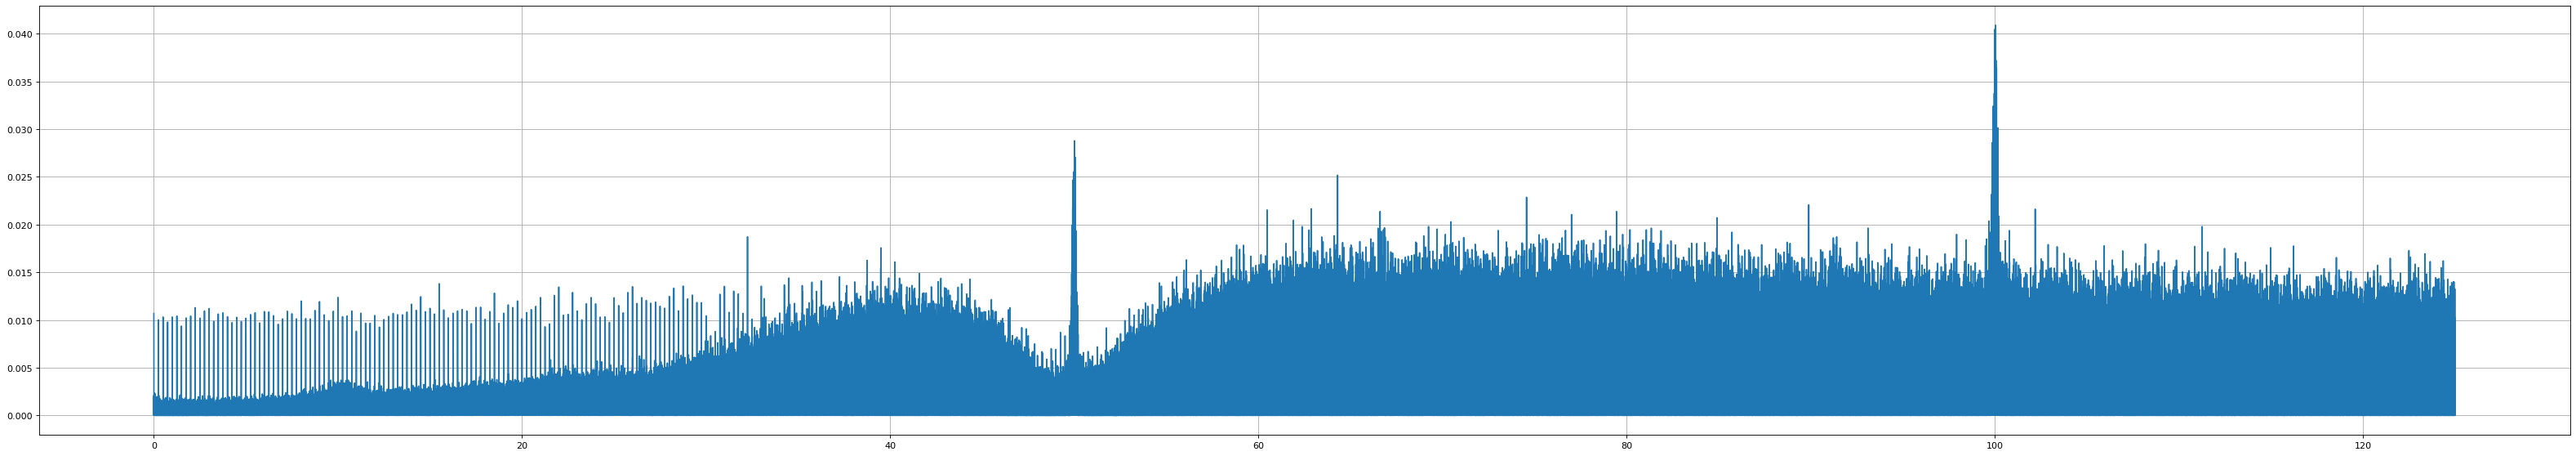

imf2 FFT plot (x-axis 0-125Hz)

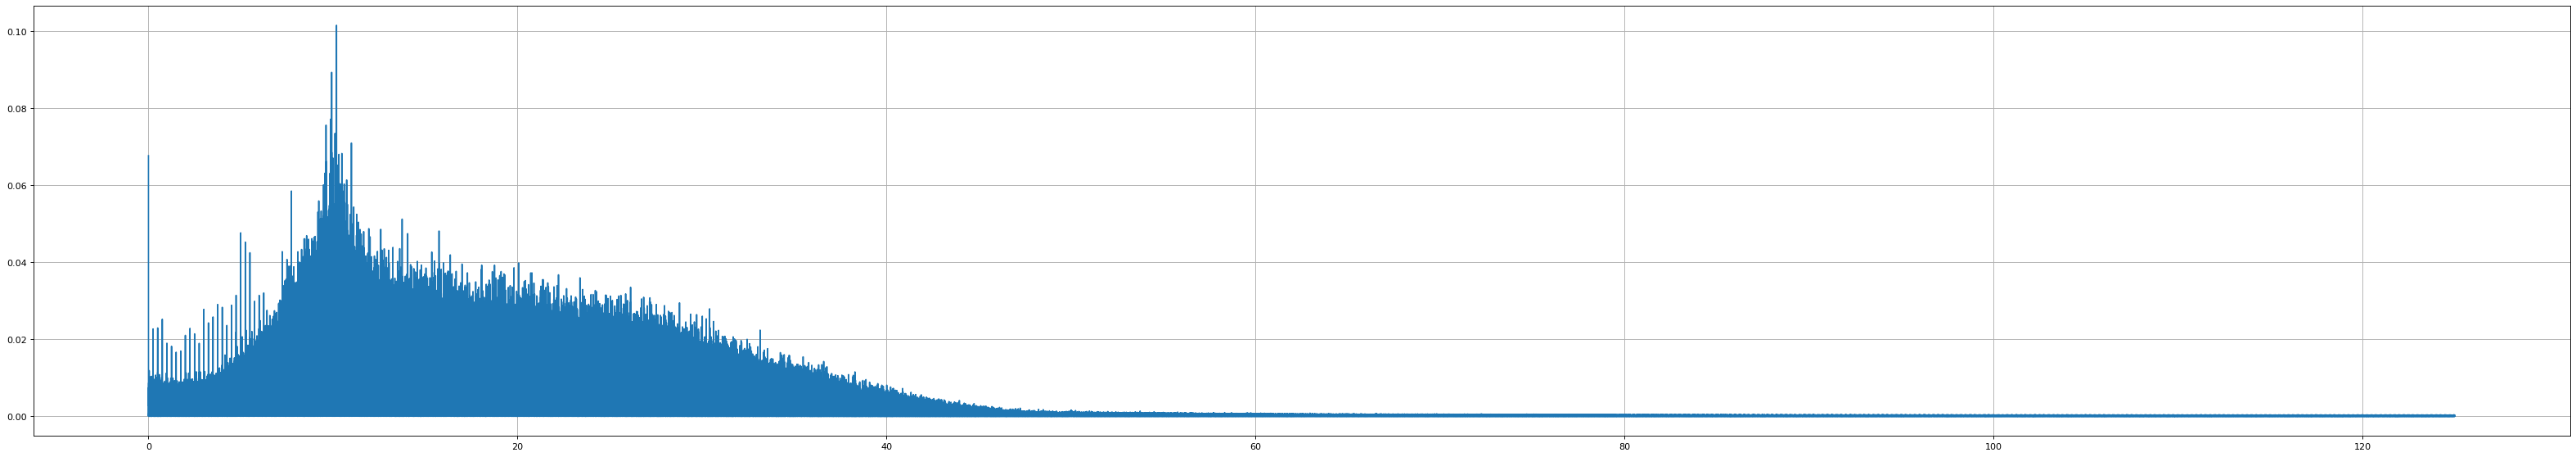

imf3 FFT plot (x-axis 0-125Hz)

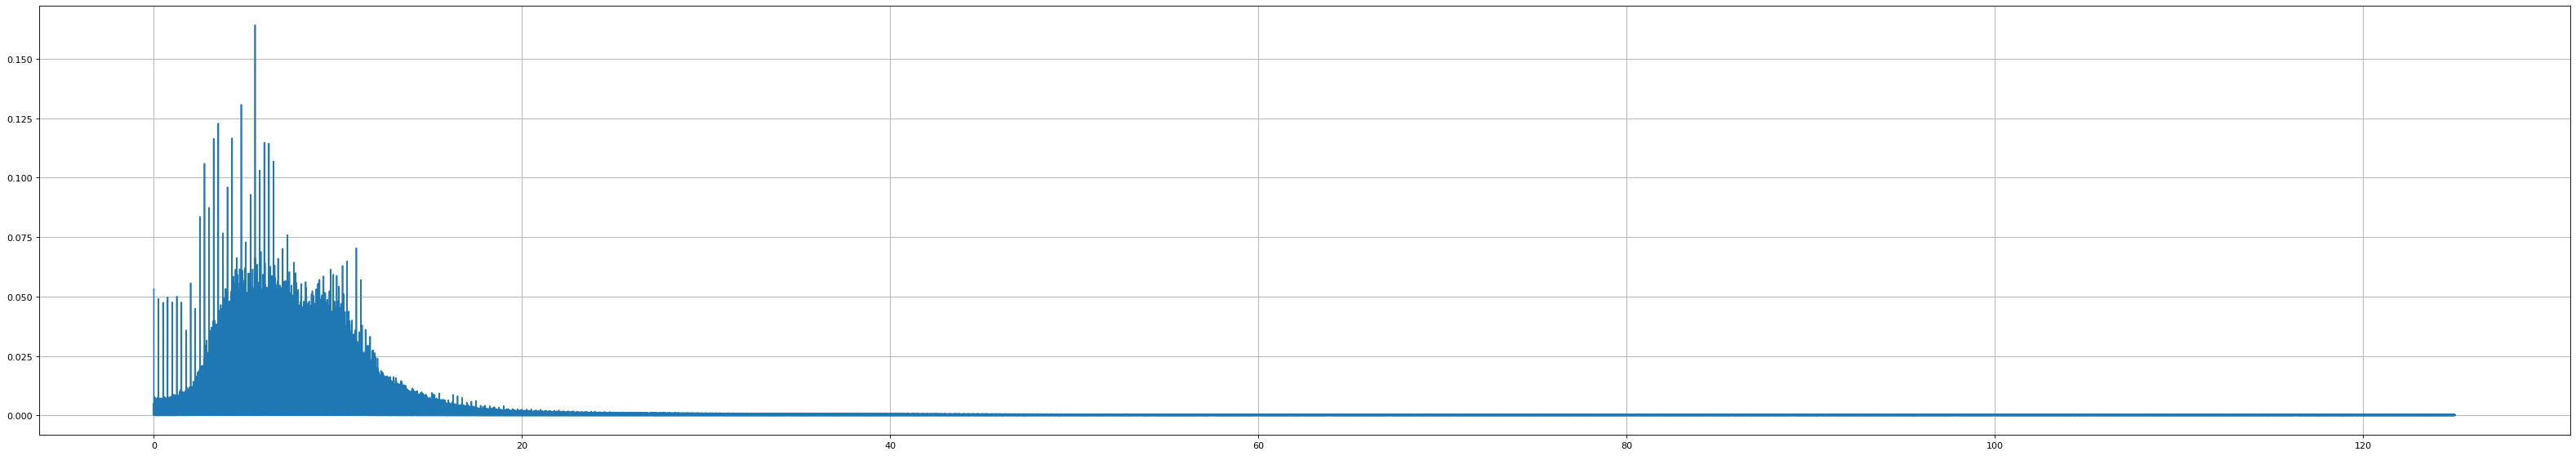

imf4 FFT plot (x-axis 0-125Hz)

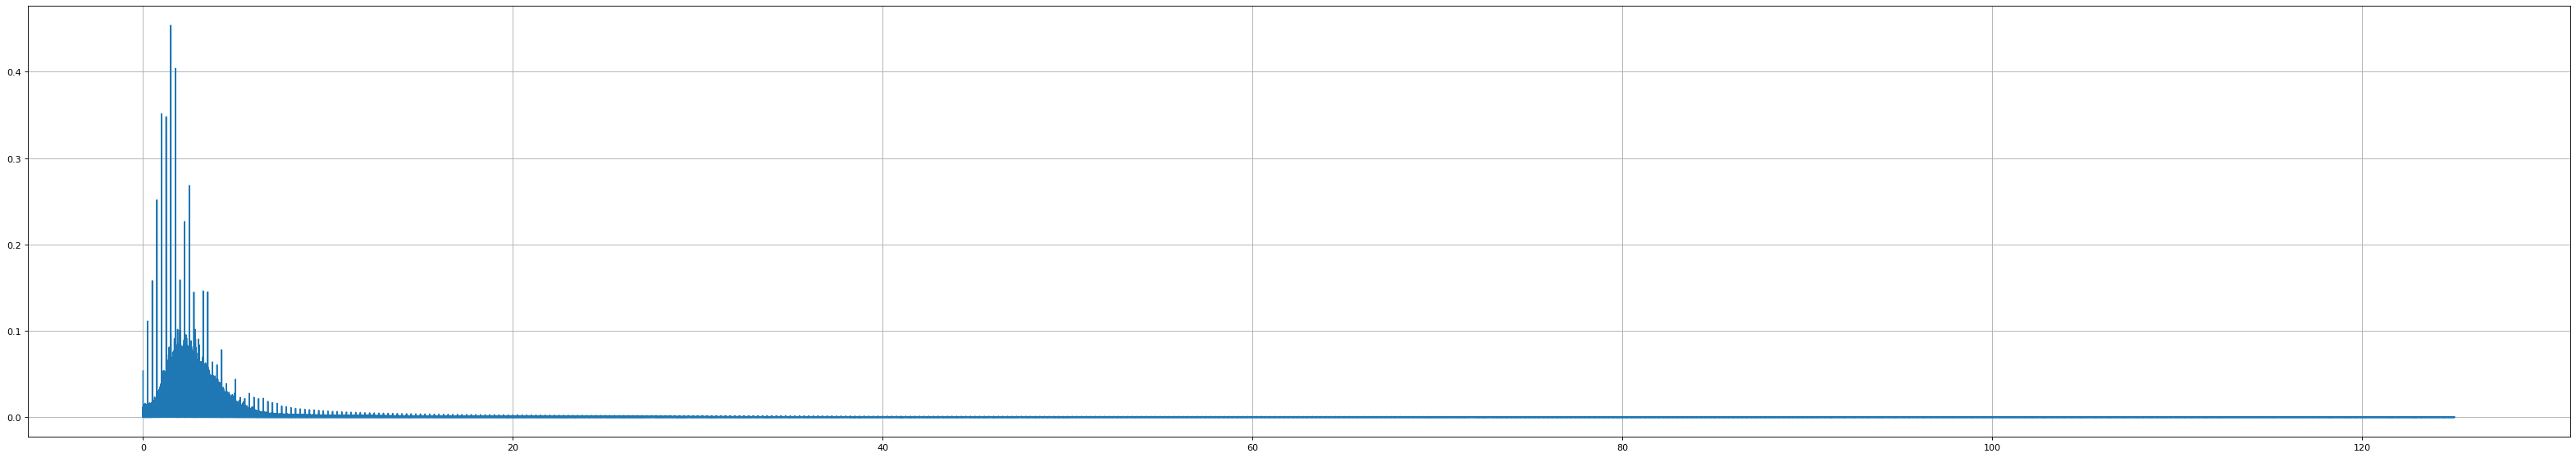

#### Visualize IMF data

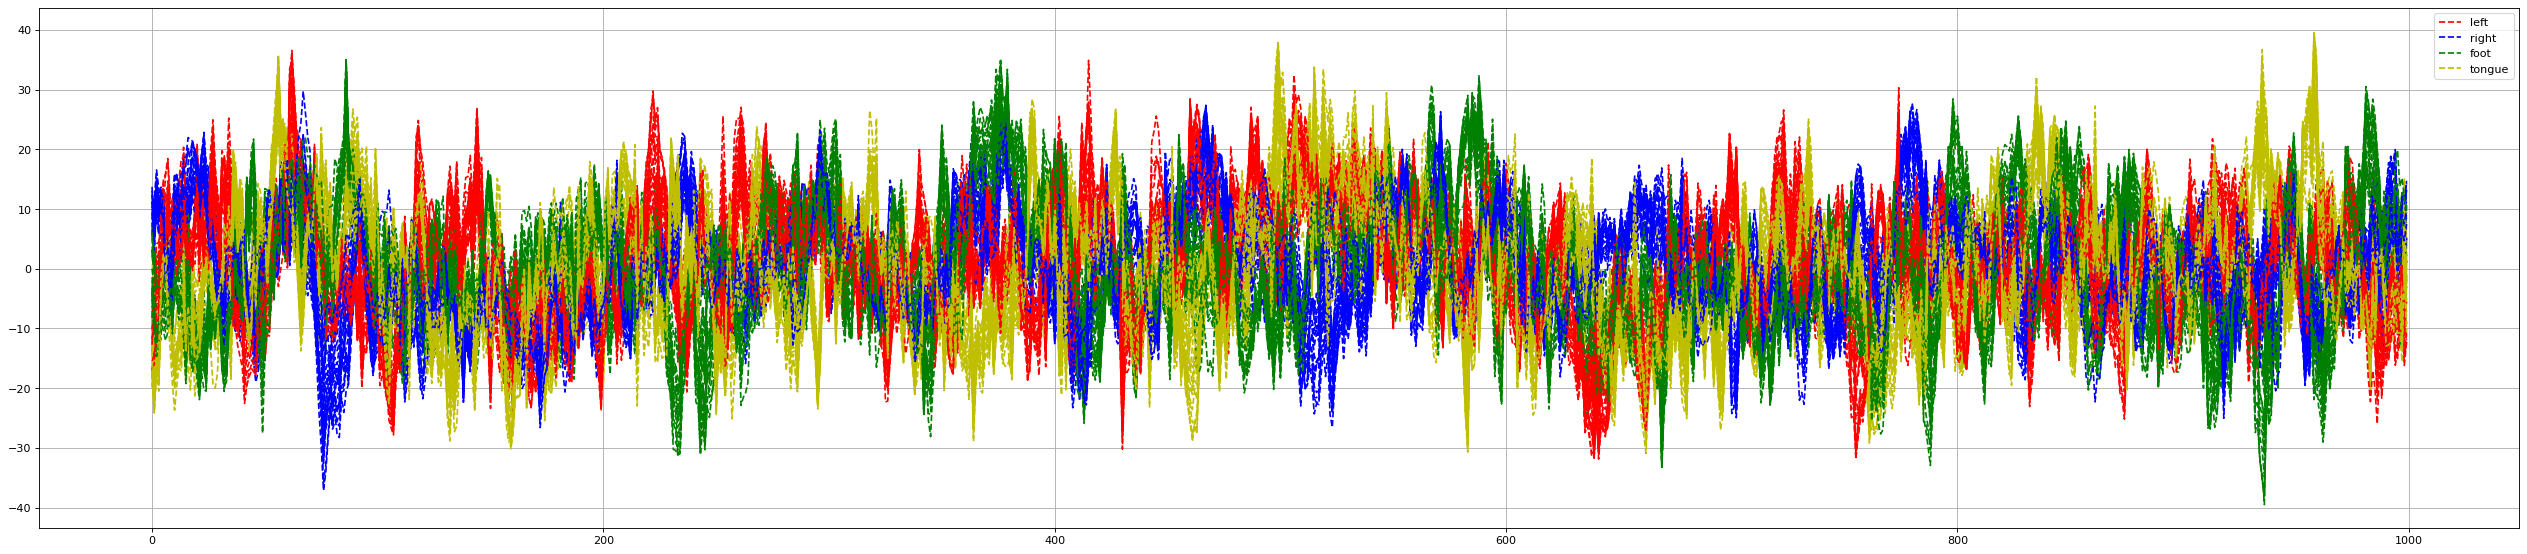

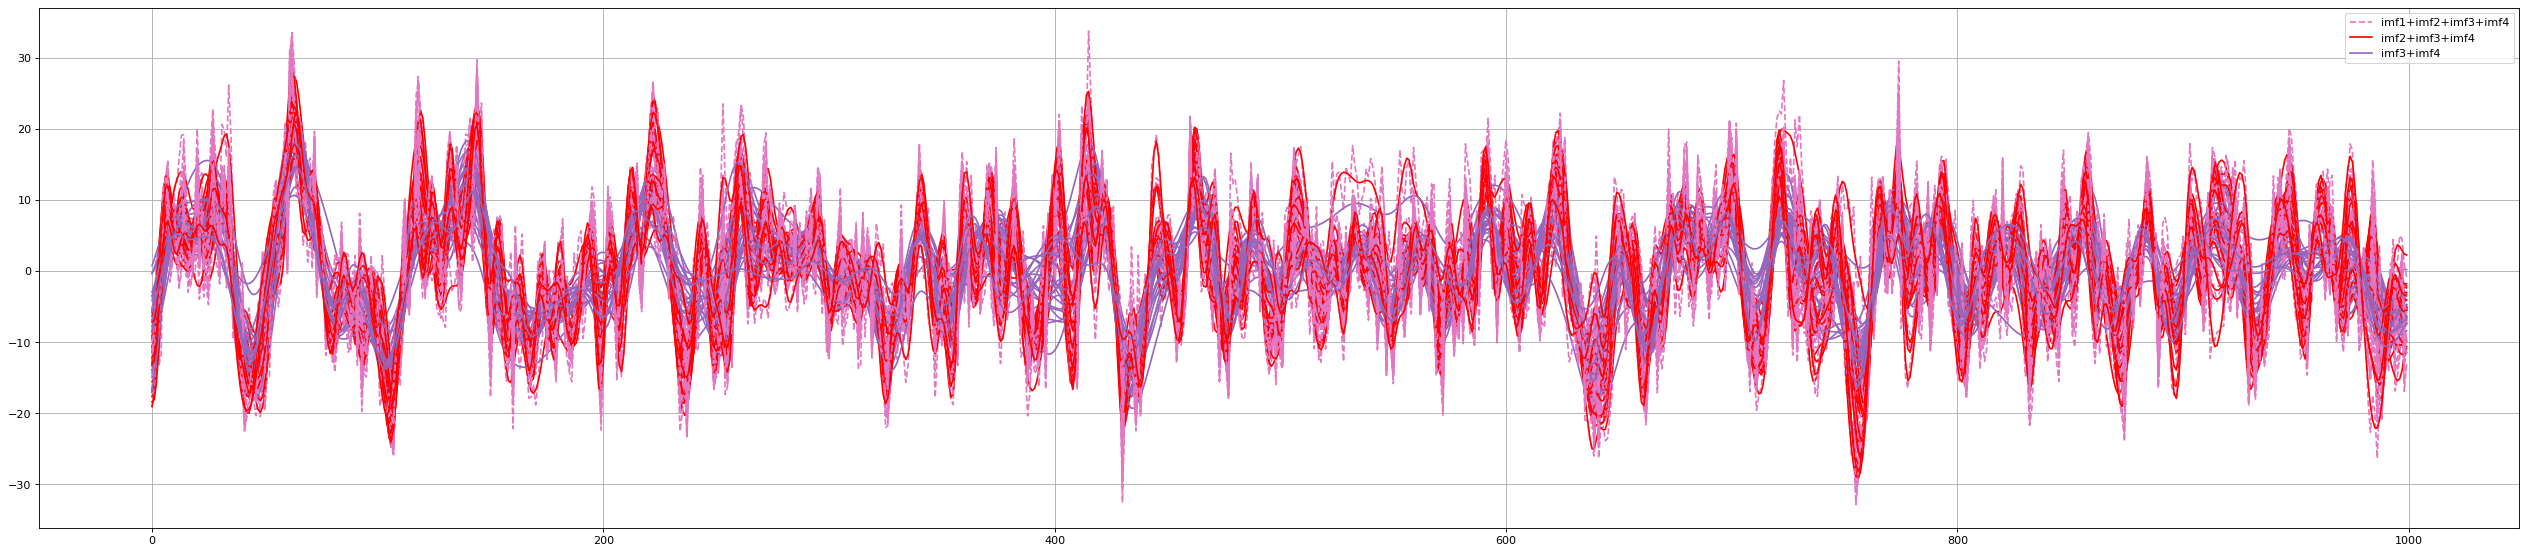

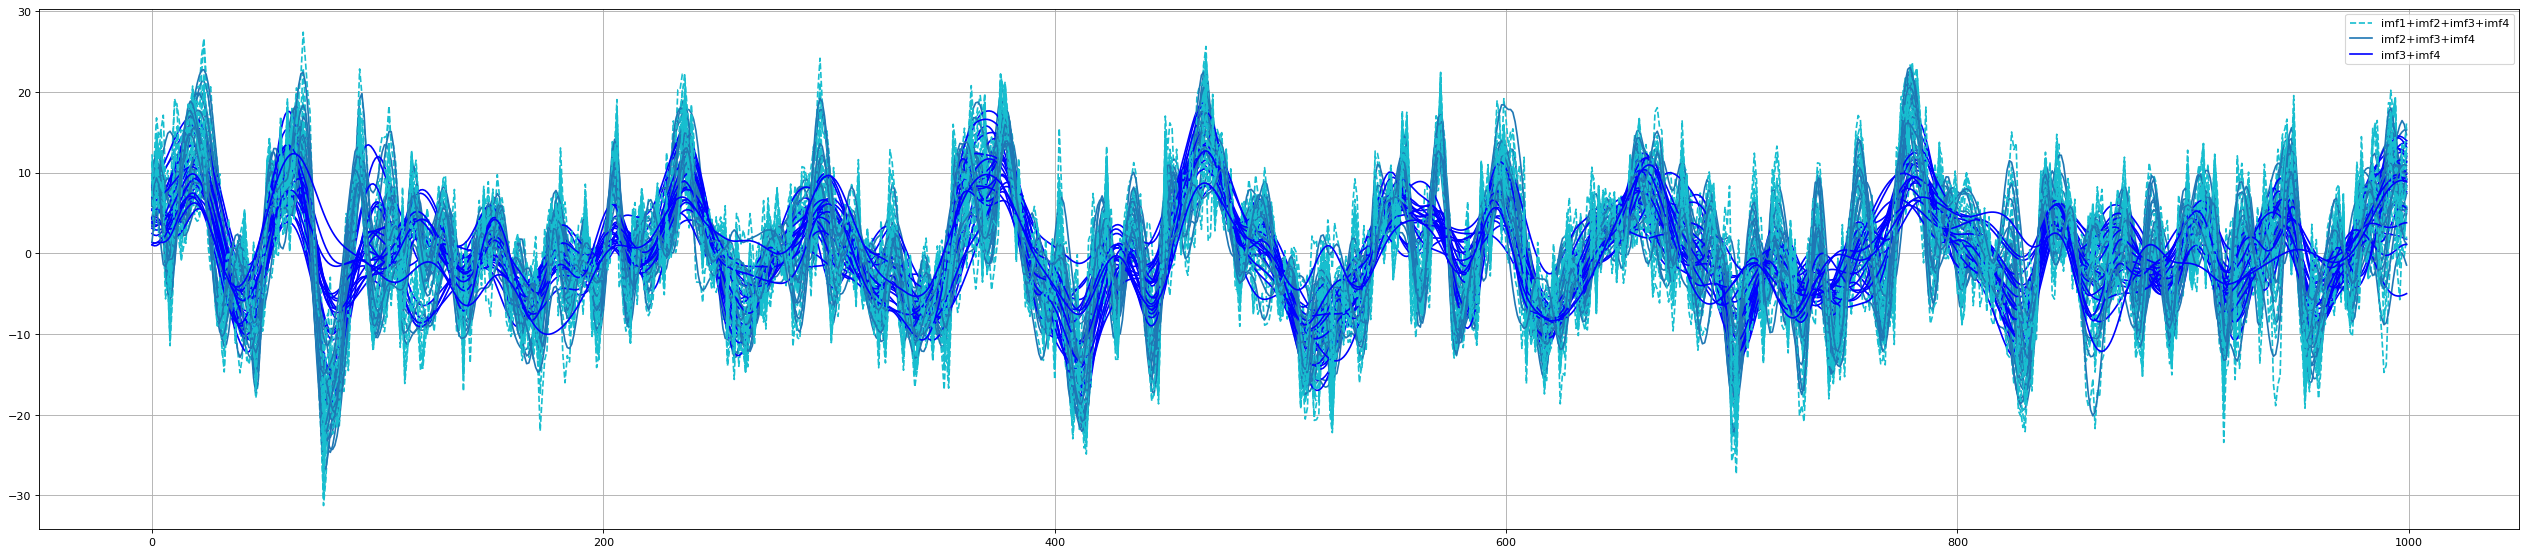

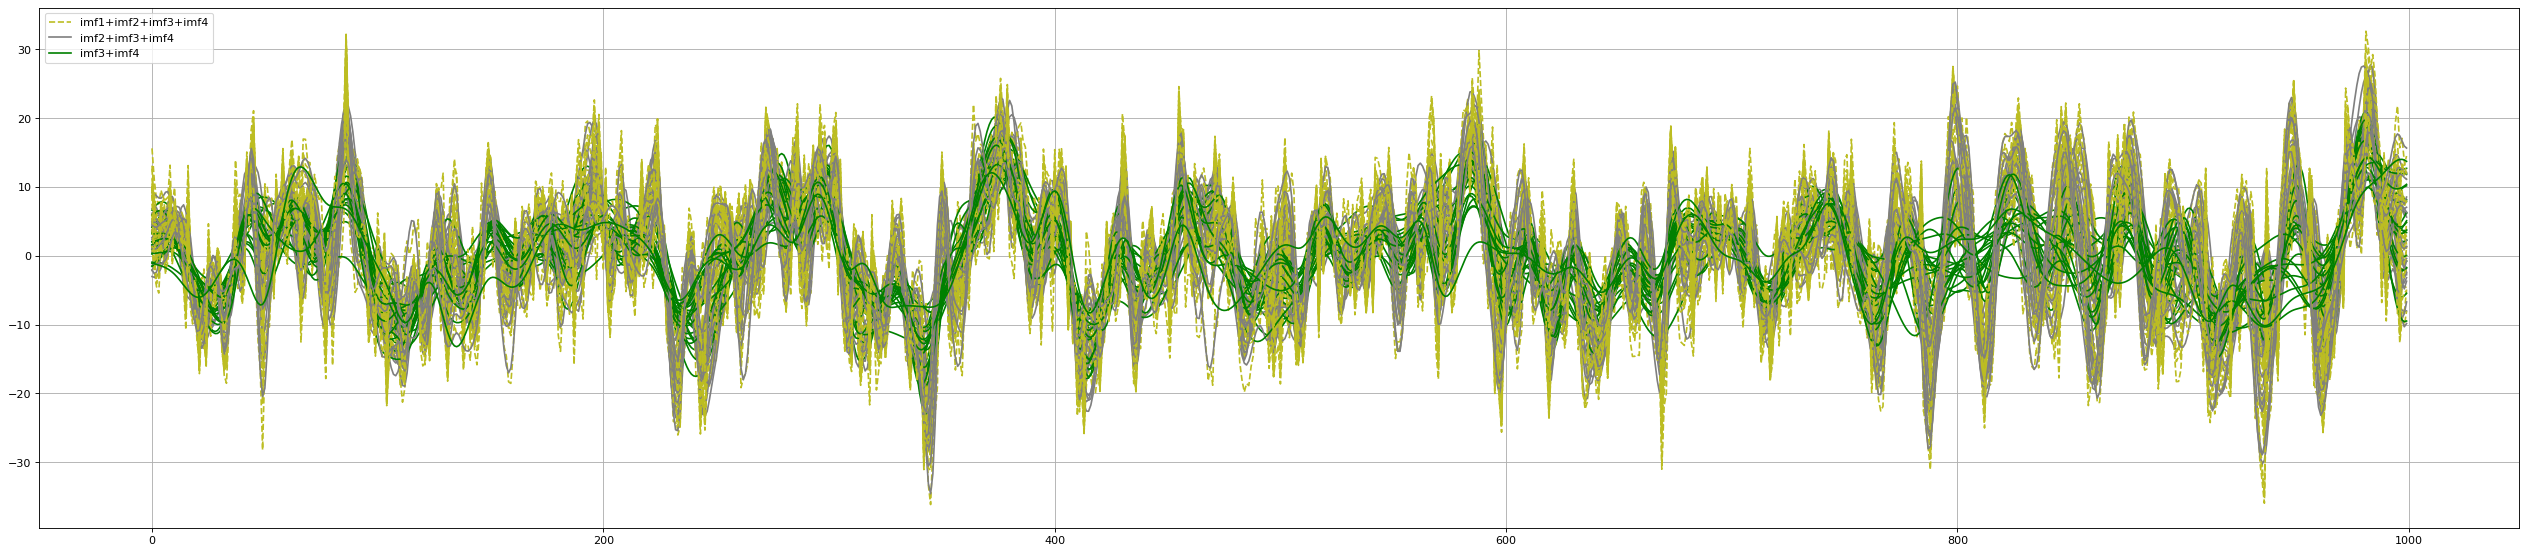

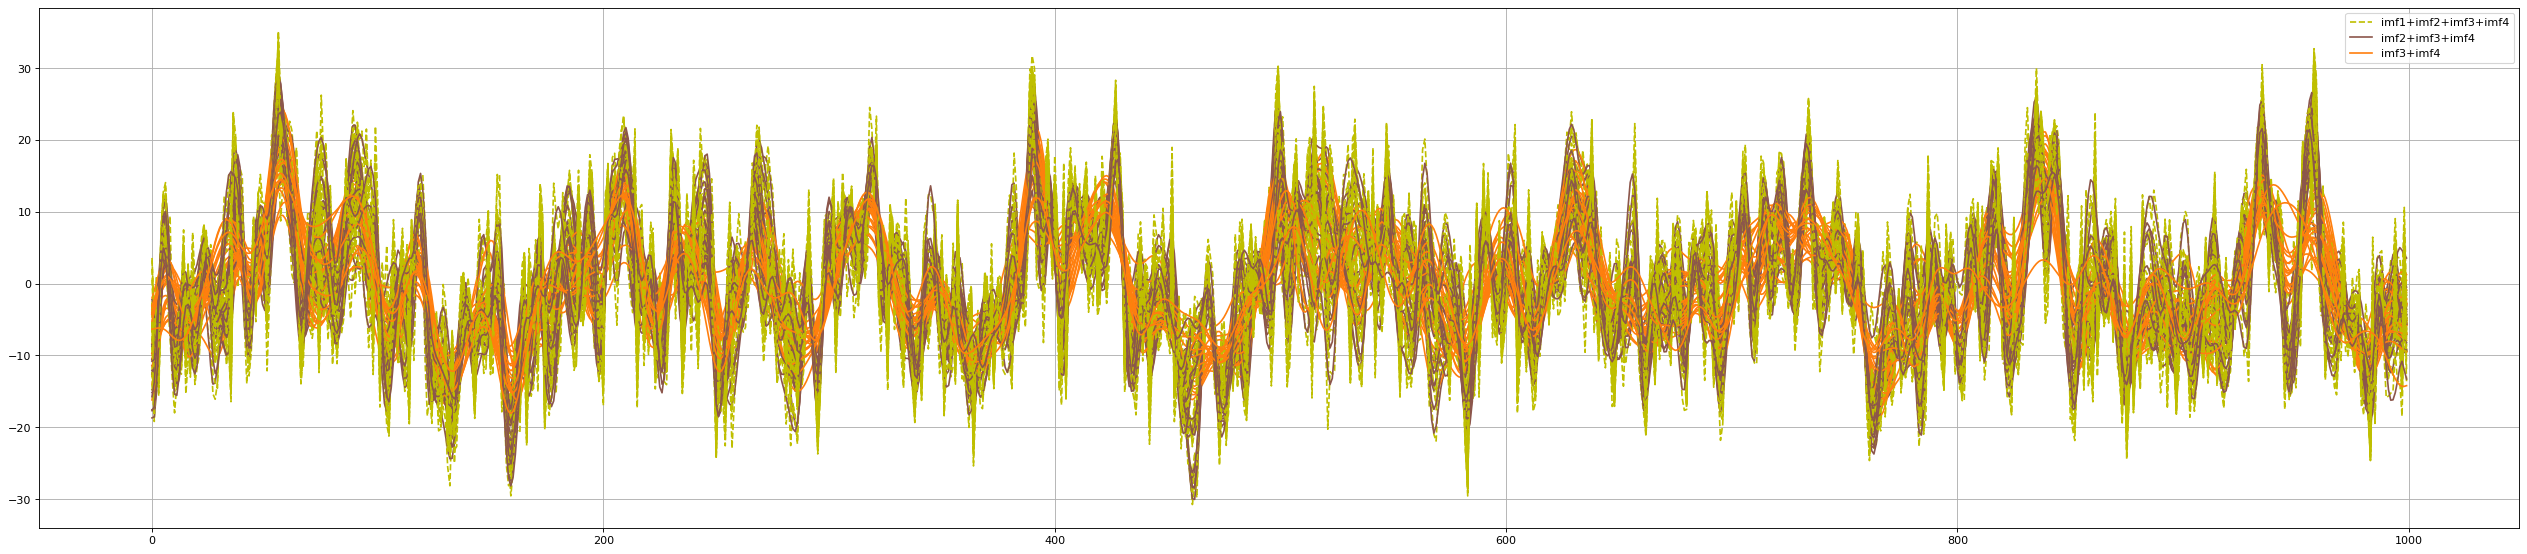

In [ ]:
# from matplotlib.pyplot import figure
# %matplotlib inline

# X_train_valid_imf34 = X_train_valid_imf3 + X_train_valid_imf4
# X_train_valid_imf234 = X_train_valid_imf34 + X_train_valid_imf2
# X_train_valid_imf1234 = X_train_valid_imf234 + X_train_valid_imf1

# fig = plt.figure(figsize=(40, 50), dpi=80)
# ax = fig.add_subplot(511)
# subject = 0
# for i in np.arange(22):
#   plt.plot(X_train_valid[Data[subject]['train_valid_left_index'][0],i,:],'--r')
#   plt.plot(X_train_valid[Data[subject]['train_valid_right_index'][0],i,:],'--b')
#   plt.plot(X_train_valid[Data[subject]['train_valid_foot_index'][0],i,:],'--g')
#   plt.plot(X_train_valid[Data[subject]['train_valid_tongue_index'][0],i,:],'--y')
# ax.legend(['left','right','foot','tongue'])
# plt.grid()
# plt.show()

# fig = plt.figure(figsize=(40, 50), dpi=80)
# ax = fig.add_subplot(512)
# subject = 0
# for i in np.arange(22):
#   plt.plot(X_train_valid_imf1234[Data[subject]['train_valid_left_index'][0],i,:],'--',color='#e377c2')
#   plt.plot(X_train_valid_imf234[Data[subject]['train_valid_left_index'][0],i,:],'-r')
#   plt.plot(X_train_valid_imf34[Data[subject]['train_valid_left_index'][0],i,:],'-',color='#9467bd')
# ax.legend(['imf1+imf2+imf3+imf4', 'imf2+imf3+imf4','imf3+imf4'])
# plt.grid()
# plt.show()

# fig = plt.figure(figsize=(40, 50), dpi=80)
# ax = fig.add_subplot(513)
# subject = 0
# for i in np.arange(22):
#   plt.plot(X_train_valid_imf1234[Data[subject]['train_valid_right_index'][0],i,:],'--',color='#17becf')
#   plt.plot(X_train_valid_imf234[Data[subject]['train_valid_right_index'][0],i,:],'-',color='#1f77b4')
#   plt.plot(X_train_valid_imf34[Data[subject]['train_valid_right_index'][0],i,:],'-b')
# ax.legend(['imf1+imf2+imf3+imf4', 'imf2+imf3+imf4','imf3+imf4'])
# plt.grid()
# plt.show()

# fig = plt.figure(figsize=(40, 50), dpi=80)
# ax = fig.add_subplot(514)
# subject = 0
# for i in np.arange(22):
#   plt.plot(X_train_valid_imf1234[Data[subject]['train_valid_foot_index'][0],i,:],'--',color='#bcbd22')
#   plt.plot(X_train_valid_imf234[Data[subject]['train_valid_foot_index'][0],i,:],'-',color='#7f7f7f')
#   plt.plot(X_train_valid_imf34[Data[subject]['train_valid_foot_index'][0],i,:],'-g')
# ax.legend(['imf1+imf2+imf3+imf4', 'imf2+imf3+imf4','imf3+imf4'])
# plt.grid()
# plt.show()

# fig = plt.figure(figsize=(40, 50), dpi=80)
# ax = fig.add_subplot(515)
# subject = 0
# for i in np.arange(22):
#   plt.plot(X_train_valid_imf1234[Data[subject]['train_valid_tongue_index'][0],i,:],'--y')
#   plt.plot(X_train_valid_imf234[Data[subject]['train_valid_tongue_index'][0],i,:],'-',color='#8c564b')
#   plt.plot(X_train_valid_imf34[Data[subject]['train_valid_tongue_index'][0],i,:],'-',color='#ff7f0e')
# ax.legend(['imf1+imf2+imf3+imf4', 'imf2+imf3+imf4','imf3+imf4'])
# plt.grid()
# plt.show()

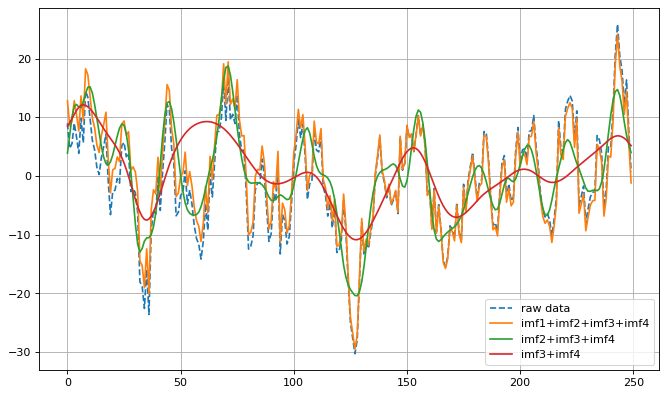

In [ ]:
# # emd data visualization

# t=250
# fig = plt.figure(figsize=(10, 6), dpi=80)
# ax = fig.add_subplot(111)
# subject = 0
# channel = 0
# ind = 32
# plt.plot(X_train_valid[Data[subject]['train_valid_foot_index'][ind],channel,0:t],'--')
# plt.plot(X_train_valid_imf1234[Data[subject]['train_valid_foot_index'][ind],channel,0:t])
# plt.plot(X_train_valid_imf234[Data[subject]['train_valid_foot_index'][ind],channel,0:t])
# plt.plot(X_train_valid_imf34[Data[subject]['train_valid_foot_index'][ind],channel,0:t])
# ax.legend(['raw data','imf1+imf2+imf3+imf4', 'imf2+imf3+imf4','imf3+imf4'])
# plt.grid()
# plt.show()

### data preprocessing comparison and trials


In [ ]:
# augument data Case 1 (raw + [shuffled imf1 + shuffled imf234] within each class)

# X_temp = []
# y_temp = []
# index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

# for i in index_list:
#   shuffled_sample_1 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_2 = np.random.choice(i, len(i), replace=False)
#   X_temp.append(X_train_valid_imf1[shuffled_sample_1] + X_train_valid_imf234[shuffled_sample_2])
#   y_temp.append(y_train_valid[i])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid, X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)
# num_valid_data = 1000
# len_t = 1000

In [ ]:
# augument data Case 2 ([shuffled imf1 + shuffled imf234] within each subject)

# X_temp = []
# y_temp = []

# for i in np.arange(9):
  # temp_index = Data[i]['train_valid_index']
  # shuffled_sample_1 = np.random.choice(temp_index, len(temp_index), replace=False)
  # shuffled_sample_2 = np.random.choice(temp_index, len(temp_index), replace=False)
  # X_temp.append(X_train_valid_imf1[shuffled_sample_1] + X_train_valid_imf234[shuffled_sample_2])
  # y_temp.append(y_train_valid[temp_index])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)
# num_valid_data = 500
# len_t = 1000

In [ ]:
# augument data Case 3 (raw + [shuffled imf1 + shuffled imf234] within each subject's each class)

# X_temp = []
# y_temp = []

# for i in np.arange(9):
#   for j in Data[i].keys():
#     if j == 'train_valid_index':
#       continue    
#     if j == 'test_index':
#       continue    
#     temp_index = Data[i][j]
#     shuffled_sample_1 = np.random.choice(temp_index, len(temp_index), replace=False)
#     shuffled_sample_2 = np.random.choice(temp_index, len(temp_index), replace=False)
#     X_temp.append(X_train_valid_imf1[shuffled_sample_1] + X_train_valid_imf234[shuffled_sample_2])
#     y_temp.append(y_train_valid[temp_index])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid, X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)
# num_valid_data = 1000
# len_t = 1000

In [ ]:
# augument data Case 4 (raw + [shuffled segment1 + shuffled segment2 + shuffled segment3 + shuffled segment4] within each class)

# X_temp = []
# y_temp = []
# index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

# for i in index_list:
#   shuffled_sample_1 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_2 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_3 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_4 = np.random.choice(i, len(i), replace=False)
#   X_temp.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
#                 ,X_train_valid[shuffled_sample_2,:,250:500]
#                 ,X_train_valid[shuffled_sample_3,:,500:750]
#                 ,X_train_valid[shuffled_sample_4,:,750:1000]), axis = 2))
#   y_temp.append(y_train_valid[i])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid, X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)
# num_valid_data = 1000
# len_t = 1000

In [ ]:
# augument data Case 5 (raw + [shuffled segment1 + shuffled segment2 + ... + shuffled segment8] within each class)

# X_temp = []
# y_temp = []
# index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

# for i in index_list:
#   shuffled_sample_1 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_2 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_3 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_4 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_5 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_6 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_7 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_8 = np.random.choice(i, len(i), replace=False)
#   X_temp.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:125] 
#                 ,X_train_valid[shuffled_sample_2,:,125:250]
#                 ,X_train_valid[shuffled_sample_3,:,250:375]
#                 ,X_train_valid[shuffled_sample_4,:,375:500]
#                 ,X_train_valid[shuffled_sample_5,:,500:625]
#                 ,X_train_valid[shuffled_sample_6,:,625:750]
#                 ,X_train_valid[shuffled_sample_7,:,750:875]
#                 ,X_train_valid[shuffled_sample_8,:,875:1000]), axis = 2))
#   y_temp.append(y_train_valid[i])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid, X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)
# num_valid_data = 1000
# len_t = 1000

In [ ]:
# augument data Case 6 ([raw seg1] (time 0-250) only)

# Xcase1 = X_train_valid[:,:,0:250]
# X_test = X_test[:,:,0:250]
# Ycase1 = y_train_valid
# num_valid_data = 500
# len_t = 250

# augument data Case 7 ([raw seg2] (time 250-500) only)

# Xcase1 = X_train_valid[:,:,250:500]
# X_test = X_test[:,:,250:500]
# Ycase1 = y_train_valid
# num_valid_data = 500
# len_t = 250

# augument data Case 8 ([raw seg3] (time 500_750) only)

# Xcase1 = X_train_valid[:,:,500:750]
# X_test = X_test[:,:,500:750]
# Ycase1 = y_train_valid
# num_valid_data = 500
# len_t = 250

# augument data Case 9 ([raw seg4] (time 750-1000) only)

# Xcase1 = X_train_valid[:,:,750:1000]
# X_test = X_test[:,:,750:1000]
# Ycase1 = y_train_valid
# num_valid_data = 500
# len_t = 250

# augument data Case 11 ([raw seg12] (time 0_500) only)

# Xcase1 = X_train_valid[:,:,0:500]
# X_test = X_test[:,:,0:500]
# Ycase1 = y_train_valid
# num_valid_data = 500
# len_t = 500

In [ ]:
# augument data Case 10 (raw + [shuffled segment1 + shuffled segment2 + shuffled segment3] within each class)

# X_temp = []
# y_temp = []
# index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

# for i in index_list:
#   shuffled_sample_1 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_2 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_3 = np.random.choice(i, len(i), replace=False)
#   X_temp.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
#                 ,X_train_valid[shuffled_sample_2,:,250:500]
#                 ,X_train_valid[shuffled_sample_3,:,500:750]), axis = 2))
#   y_temp.append(y_train_valid[i])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid[:,:,0:750], X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)
# num_valid_data = 1000
# len_t = 750

In [ ]:
# augument data Case 12 (raw + [shuffled segment1 + shuffled segment2] within each class)

# X_temp = []
# y_temp = []
# index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

# for i in index_list:
#   shuffled_sample_1 = np.random.choice(i, len(i), replace=False)
#   shuffled_sample_2 = np.random.choice(i, len(i), replace=False)
#   X_temp.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
#                 ,X_train_valid[shuffled_sample_2,:,250:500]), axis = 2))
#   y_temp.append(y_train_valid[i])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid[:,:,0:500], X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)
# num_valid_data = 1000
# len_t = 500

In [ ]:
# augument data Case 13 (raw + [shuffled segment1 + shuffled segment2 + shuffled segment3]x2 within each class)

# X_temp = []
# y_temp = []
# index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

# for j in np.arange(2):
#   for i in index_list:
#     shuffled_sample_1 = np.random.choice(i, len(i), replace=False)
#     shuffled_sample_2 = np.random.choice(i, len(i), replace=False)
#     shuffled_sample_3 = np.random.choice(i, len(i), replace=False)
#     X_temp.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
#                   ,X_train_valid[shuffled_sample_2,:,250:500]
#                   ,X_train_valid[shuffled_sample_3,:,500:750]), axis = 2))
#     y_temp.append(y_train_valid[i])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid[:,:,0:750], X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)
# num_valid_data = 1500
# len_t = 750

In [ ]:
# # augument data Case 13 (raw + [shuffled segment1 + shuffled segment2 + shuffled segment3]x3 within each class)

# X_temp = []
# y_temp = []
# index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

# for j in np.arange(3):
#   for i in index_list:
#     shuffled_sample_1 = np.random.choice(i, len(i), replace=False)
#     shuffled_sample_2 = np.random.choice(i, len(i), replace=False)
#     shuffled_sample_3 = np.random.choice(i, len(i), replace=False)
#     X_temp.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
#                   ,X_train_valid[shuffled_sample_2,:,250:500]
#                   ,X_train_valid[shuffled_sample_3,:,500:750]), axis = 2))
#     y_temp.append(y_train_valid[i])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid[:,:,0:750], X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)
# num_valid_data = 2000
# len_t = 750

In [ ]:
# #augument data Case 14 channels on the right (t = 0-750)

# right_channels = [5, 6, 11, 12, 13, 17, 18, 21]
# right_channels[:] = [right_channel - 1 for right_channel in right_channels]

# Xcase1 = X_train_valid[:,right_channels,0:750]
# X_test = X_test[:,right_channels,0:750]
# Ycase1 = y_train_valid
# num_valid_data = 500
# len_t = 750
# print(Xcase1.shape)
# patience = 30
# show_shapes = False

(2115, 8, 750)


In [ ]:
# # augument data Case 14 channels on the left (t = 0-750)

# left_channels = [2, 3, 7, 8, 9, 14, 15, 19]
# left_channels[:] = [left_channel - 1 for left_channel in left_channels]

# Xcase1 = X_train_valid[:,left_channels,0:750]
# X_test = X_test[:,left_channels,0:750]
# Ycase1 = y_train_valid
# num_valid_data = 500
# len_t = 750
# print(Xcase1.shape)
# patience = 30
# show_shapes = False

(2115, 8, 750)


In [ ]:
# # augument data Case 14 channels on the center (t = 0-750)

# center_channels = [1, 4, 10, 16, 20, 22]
# center_channels[:] = [center_channel - 1 for center_channel in center_channels]

# Xcase1 = X_train_valid[:,center_channels,0:750]
# X_test = X_test[:,center_channels,0:750]
# Ycase1 = y_train_valid
# num_valid_data = 500
# len_t = 750
# print(Xcase1.shape)
# patience = 30
# show_shapes = False

(2115, 6, 750)


In [ ]:
# augument data Case 16 run each channel (t = 0-750) raw + [shuffled segment1 + shuffled segment2 + shuffled segment3]x3 within each class

# X_temp = []
# y_temp = []
# index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

# for j in np.arange(3):
#   for i in index_list:
#     shuffled_sample_1 = np.random.choice(i, len(i), replace=False)
#     shuffled_sample_2 = np.random.choice(i, len(i), replace=False)
#     shuffled_sample_3 = np.random.choice(i, len(i), replace=False)
#     X_temp.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
#                   ,X_train_valid[shuffled_sample_2,:,250:500]
#                   ,X_train_valid[shuffled_sample_3,:,500:750]), axis = 2))
#     y_temp.append(y_train_valid[i])

# X_train_valid_new = np.concatenate(X_temp,0)
# y_train_valid_new = np.concatenate(y_temp,0)

# Xcase1 = np.concatenate((X_train_valid[:,:,0:750], X_train_valid_new), axis = 0)
# Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)

# ch = [21]

# Xcase1 = Xcase1[:,ch,0:750]
# X_test = X_test[:,ch,0:750]
# num_valid_data = 2000
# len_t = 750

### Label Data and find the number of data in each group/sub-group

In [ ]:
## Adjusting the labels to {0,1,2,3}

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3
y_train_valid -= 769
y_test -= 769

In [ ]:
## find total number of data for each class

indexLeft, = np.where(y_train_valid == 0)
indexRight, = np.where(y_train_valid == 1)
indexFoot, = np.where(y_train_valid == 2)
indexTongue, = np.where(y_train_valid == 3)
print ('# of cue onset left train_valid data: {}'.format(indexLeft.shape))
print ('# of cue onset right train_valid data: {}'.format(indexRight.shape))
print ('# of cue onset foot train_valid data: {}'.format(indexFoot.shape))
print ('# of cue onset tongue train_valid data: {}'.format(indexTongue.shape))
indexLeft_test, = np.where(y_test == 0)
indexRight_test, = np.where(y_test == 1)
indexFoot_test, = np.where(y_test == 2)
indexTongue_test, = np.where(y_test == 3)
print ('# of cue onset left y_test data: {}'.format(indexLeft_test.shape))
print ('# of cue onset right y_test data: {}'.format(indexRight_test.shape))
print ('# of cue onset foot y_test data: {}'.format(indexFoot_test.shape))
print ('# of cue onset tongue y_test data: {}'.format(indexTongue_test.shape))

# of cue onset left train_valid data: (529,)
# of cue onset right train_valid data: (513,)
# of cue onset foot train_valid data: (543,)
# of cue onset tongue train_valid data: (530,)
# of cue onset left y_test data: (111,)
# of cue onset right y_test data: (127,)
# of cue onset foot y_test data: (96,)
# of cue onset tongue y_test data: (109,)


In [ ]:
## find total number of data for each subject

## Subject total 9
# suject - 0~8

Data = { }
num_subject = 9
for i in np.arange(9):

  ## total
  Data[i] = {}
  Data[i]['train_valid_index'] = np.where(person_train_valid == i)
  print('subject {}'.format(i), 'train_valid data: {}'.format(len(Data[i]['train_valid_index'][0])))

  list_as_set = set(Data[i]['train_valid_index'][0])

  ## left hand 
  intersection = list_as_set.intersection(indexLeft)
  Data[i]['train_valid_left_index'] = list(intersection)
  print('subject {}'.format(i), 'train_valid data (Left): {}'.format(len(Data[i]['train_valid_left_index'])))

  ## right hand 
  intersection = list_as_set.intersection(indexRight)
  Data[i]['train_valid_right_index'] = list(intersection)
  print('subject {}'.format(i), 'train_valid data (Right): {}'.format(len(Data[i]['train_valid_right_index'])))

  ## foot
  intersection = list_as_set.intersection(indexFoot)
  Data[i]['train_valid_foot_index'] = list(intersection)
  print('subject {}'.format(i), 'train_valid data (Foot): {}'.format(len(Data[i]['train_valid_foot_index'])))

  ## tongue
  intersection = list_as_set.intersection(indexTongue)
  Data[i]['train_valid_tongue_index'] = list(intersection)
  print('subject {}'.format(i), 'train_valid data (Tongue): {}'.format(len(Data[i]['train_valid_tongue_index'])))

  ## test
  Data[i]['test_index'] = np.where(person_test == i)
  print('subject {}'.format(i), 'test data: {}'.format(len(Data[i]['test_index'][0])))


subject 0 train_valid data: 237
subject 0 train_valid data (Left): 60
subject 0 train_valid data (Right): 59
subject 0 train_valid data (Foot): 58
subject 0 train_valid data (Tongue): 60
subject 0 test data: 50
subject 1 train_valid data: 236
subject 1 train_valid data (Left): 60
subject 1 train_valid data (Right): 57
subject 1 train_valid data (Foot): 62
subject 1 train_valid data (Tongue): 57
subject 1 test data: 50
subject 2 train_valid data: 236
subject 2 train_valid data (Left): 56
subject 2 train_valid data (Right): 60
subject 2 train_valid data (Foot): 63
subject 2 train_valid data (Tongue): 57
subject 2 test data: 50
subject 3 train_valid data: 234
subject 3 train_valid data (Left): 66
subject 3 train_valid data (Right): 54
subject 3 train_valid data (Foot): 56
subject 3 train_valid data (Tongue): 58
subject 3 test data: 50
subject 4 train_valid data: 235
subject 4 train_valid data (Left): 55
subject 4 train_valid data (Right): 60
subject 4 train_valid data (Foot): 59
subject 4

### Prepare the training and validation dataset

In [ ]:
# two different ways to prepare the training and validation dataset 

# after_correction --> separate data into valid & train then augment
# before_correction --> augment then separate data into valid & train

flag = 1  # pick which method to prepare the dataset
          # after_correction = 0
          # before_correction = 1
          # train_with_all = 2

all_training = False     # use all the train-valid data to train the model
K = 5                    # number of K-folds 
num_augment_set = 4      # the size of augmented dataset (if after_correction is True, = 4)

# Label Smoothing
LabelSmoothingFactor = 0.2

#### After Correction: separate data into valid & train then augment training data

In [ ]:
if flag == 0:
  ## separate train_valid data into training data 80% and validation data 20%

  # 9 subject x 4 classes = 36 sub-groups. 
  # separate data from each sub-group into K folds

  ind_valid = []
  indices_list = [[] for k in np.arange(K)]

  for sub in np.arange(9):

    temp_list = Data[sub]['train_valid_left_index']
    splits = np.array_split(temp_list, K)
    for c, split in enumerate(splits):
      indices_list[c].extend(split)

    temp_list = Data[sub]['train_valid_right_index']
    splits = np.array_split(temp_list, K)
    for c, split in enumerate(splits):
      indices_list[c].extend(split)

    temp_list = Data[sub]['train_valid_foot_index']
    splits = np.array_split(temp_list, K)
    for c, split in enumerate(splits):
      indices_list[c].extend(split)

    temp_list = Data[sub]['train_valid_tongue_index']
    splits = np.array_split(temp_list, K)
    for c, split in enumerate(splits):
      indices_list[c].extend(split)

  ## cross validation OFF 

  if all_training == True:
    ind_valid = []
    ind_train = np.concatenate(indices_list,axis=0)
  else:
    k = 0 # zero fold is valid data else training data
    ind_valid = indices_list[k]
    temp = np.setdiff1d(np.arange(K),k)
    ind_train = []
    for j in temp:
      ind_train.extend(indices_list[j])

  ## augument data 

  ## augmented data set contains
  ## [shuffled time-segment1 + shuffled time-segment2 + shuffled time-segment3] 
  ## x num_augment_set

  ## final augmented data size/shape = 
  ## (2115*num_augment_set, 22, len_t) - (balance_population_of_data*num_augment_set, 22, len_t)

  len_t = 750               # length of data points (t) to be used
  if all_training == True:
    num_train_class = 513
  else:
    num_train_class = 513*(K-1)//(K) # num of train data in each class 
    num_valid_class = 513//(K)  # num of valid data in each class

  augment_validation_data = False

  index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]
  num_index_list = [len(j) for j in index_list]

  X_temp_train, X_temp_valid = [], []
  y_temp_train, y_temp_valid = [], []
  for j in np.arange(num_augment_set):
    for c, ind_list in enumerate(index_list):
      compare = set(ind_list)

      # augment training data set
      temp_list = [i for i, item in enumerate(ind_train) if item in compare]
      num_data_teamp = num_train_class 
      shuffled_sample_1 = np.random.choice(temp_list, num_data_teamp, replace=True)
      shuffled_sample_2 = np.random.choice(temp_list, num_data_teamp, replace=True)
      shuffled_sample_3 = np.random.choice(temp_list, num_data_teamp, replace=True)
      X_temp_train.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
                    ,X_train_valid[shuffled_sample_2,:,250:500]
                    ,X_train_valid[shuffled_sample_3,:,500:750]
                    ), axis = 2))
      y_temp_train.append(y_train_valid[shuffled_sample_1]) 

      if augment_validation_data == True:
        # augment validation data set
        temp_list = [i for i, item in enumerate(ind_valid) if item in compare]
        num_data_teamp = num_valid_class 
        shuffled_sample_1 = np.random.choice(temp_list, num_data_teamp, replace=True)
        shuffled_sample_2 = np.random.choice(temp_list, num_data_teamp, replace=True)
        shuffled_sample_3 = np.random.choice(temp_list, num_data_teamp, replace=True)
        X_temp_valid.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
                      ,X_train_valid[shuffled_sample_2,:,250:500]
                      ,X_train_valid[shuffled_sample_3,:,500:750]
                      ), axis = 2))
        y_temp_valid.append(y_train_valid[shuffled_sample_1]) 

  X_train_new = np.concatenate(X_temp_train,0)
  y_train_new = np.concatenate(y_temp_train,0)
  x_train = np.concatenate((X_train_valid[ind_train,:,0:len_t], X_train_new), axis = 0)
  y_train = np.concatenate((y_train_valid[ind_train], y_train_new), axis = 0)

  if augment_validation_data == True:
    X_valid_new = np.concatenate(X_temp_valid,0)
    y_valid_new = np.concatenate(y_temp_valid,0)
    x_valid = np.concatenate((X_train_valid[ind_valid,:,0:len_t], X_valid_new), axis = 0)
    y_valid = np.concatenate((y_train_valid[ind_valid], y_valid_new), axis = 0)
  else:  
    x_valid = X_train_valid[ind_valid,:,0:len_t]
    y_valid = y_train_valid[ind_valid]


#### Before Correction: augment raw data then separate into valid & train

In [ ]:
if flag == 1:

  ## augmented data set contains
  ## [shuffled time-segment1 + shuffled time-segment2 + shuffled time-segment3] 
  ## x num_augment_set

  ## final augmented data size/shape = 
  ## (2115*num_augment_set, 22, len_t) - (balance_population_of_data*num_augment_set, 22, len_t)

  num_augment_set = 4                         # the size of augmented dataset
  len_t = 750                                 # length of data points (t) to be used

  balance_population_of_data = [21,0,40,22]   # control the total # of aug data
                                              # to balance population of data across
                                              # all the classes

  index_choice = [np.arange(X_train_valid.shape[0])] # keep track of index to later relate it with subject group
  X_temp = []
  y_temp = []
  index_list = [list(indexLeft),list(indexRight),list(indexFoot),list(indexTongue)]

  for j in np.arange(num_augment_set):
    for c, i in enumerate(index_list):
      num_data_teamp = len(i) - balance_population_of_data[c]
      shuffled_sample_1 = np.random.choice(i, num_data_teamp, replace=False)
      shuffled_sample_2 = np.random.choice(i, num_data_teamp, replace=False)
      shuffled_sample_3 = np.random.choice(i, num_data_teamp, replace=False)
      X_temp.append(np.concatenate((X_train_valid[shuffled_sample_1,:,0:250] 
                    ,X_train_valid[shuffled_sample_2,:,250:500]
                    ,X_train_valid[shuffled_sample_3,:,500:750]
                    ), axis = 2))
      y_temp.append(y_train_valid[shuffled_sample_1]) 
      index_choice.append(shuffled_sample_1)

  X_train_valid_new = np.concatenate(X_temp,0)
  y_train_valid_new = np.concatenate(y_temp,0)
  index_choice = np.concatenate(index_choice,0)

  Xcase1 = np.concatenate((X_train_valid[:,:,0:len_t], X_train_valid_new), axis = 0)
  Ycase1 = np.concatenate((y_train_valid, y_train_valid_new), axis = 0)

  ## separate data into valid & train
  indices_list = [[],[],[],[],[]]
  K=5
  for sub in np.arange(9):

    compare = set(Data[sub]['train_valid_left_index'])
    temp_list = [i for i, item in enumerate(index_choice) if item in compare]
    splits = np.array_split(temp_list, K)
    for c, split in enumerate(splits):
      indices_list[c].extend(split)

    compare = set(Data[sub]['train_valid_right_index'])
    temp_list = [i for i, item in enumerate(index_choice) if item in compare]
    splits = np.array_split(temp_list, K)
    for c, split in enumerate(splits):
      indices_list[c].extend(split)

    compare = set(Data[sub]['train_valid_foot_index'])
    temp_list = [i for i, item in enumerate(index_choice) if item in compare]
    splits = np.array_split(temp_list, K)
    for c, split in enumerate(splits):
      indices_list[c].extend(split)

    compare = set(Data[sub]['train_valid_tongue_index'])
    temp_list = [i for i, item in enumerate(index_choice) if item in compare]
    splits = np.array_split(temp_list, K)
    for c, split in enumerate(splits):
      indices_list[c].extend(split)

  k = 0 # zero fold is valid sample else training sample
  ind_valid = indices_list[k]
  temp = np.setdiff1d(np.arange(K),k)
  ind_train = []
  for j in temp:
    ind_train.extend(indices_list[j])

  ## assign the training and validation sets

  XN,XC,XT = Xcase1.shape
  YN, = Ycase1.shape

  # Creating the training and validation sets using the previously generated indices
  (x_train, x_valid) = Xcase1[ind_train], Xcase1[ind_valid] 
  (y_train, y_valid) = Ycase1[ind_train], Ycase1[ind_valid]

#### use all the saved augmented train-valid data to train the model 
(the same dataset used to achieve 78.78% test accuracy under "before Correction" method)

In [ ]:
if flag == 2:
  len_t = 750
  Xcase1 = np.load(directory + 'Xcase1.npy')
  Ycase1 = np.load(directory + 'Ycase1.npy')
  ind_valid = []
  (x_train, x_valid) = Xcase1, Xcase1[ind_valid,:,0:len_t] 
  (y_train, y_valid) = Ycase1, Ycase1[ind_valid]

#### Check population of each class withint the prepared training data

In [ ]:
## Check size of prepared data
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)

## Check population of each class within the prepared data
a,aa = np.where(y_train == 0), np.where(y_valid == 0)
b,bb = np.where(y_train == 1), np.where(y_valid == 1)
c,cc = np.where(y_train == 2), np.where(y_valid == 2)
d,dd = np.where(y_train == 3), np.where(y_valid == 3)
print('Number of Train/Valid Left Hand class data: ', len(list(a[0])), len(list(aa[0])))
print('Number of Train/Valid Right Hand class data:', len(list(b[0])), len(list(bb[0])))
print('Number of Train/Valid Foot class data:      ', len(list(c[0])), len(list(cc[0])))
print('Number of Train/Valid Tongue class data:    ', len(list(d[0])), len(list(dd[0])))

Shape of training set: (10243, 22, 750)
Shape of validation set: (0, 22, 750)
Shape of training labels: (10243,)
Shape of validation labels: (0,)
Number of Train/Valid Left Hand class data:  2561 0
Number of Train/Valid Right Hand class data: 2565 0
Number of Train/Valid Foot class data:       2555 0
Number of Train/Valid Tongue class data:     2562 0


#### One hot encoding and Label Smoothing

In [ ]:
# Converting the labels to categorical variables for multiclass classification (one hot encoding)
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)
print('Shape of training labels after categorical conversion:', y_train.shape)
print('Shape of validation labels after categorical conversion:', y_valid.shape)
print('Shape of test labels after categorical conversion:', y_test.shape)

# Apply Label Smoothing on training sample
eps = LabelSmoothingFactor
y_train[np.where(y_train == 1)] -= eps
y_train[np.where(y_train == 0)] = eps/3

Shape of training labels after categorical conversion: (10243, 4)
Shape of validation labels after categorical conversion: (0, 4)
Shape of test labels after categorical conversion: (443, 4)


#### rearrange data structure for 2D conv

In [ ]:
## Prepare data for 2D conv

# Adding width of the segment to be 1
x_train_2D = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid_2D = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test_2D = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print('Shape of training set after adding width info:',x_train_2D.shape)
print('Shape of validation set after adding width info:',x_valid_2D.shape)
print('Shape of test set after adding width info:',x_test_2D.shape)

# Reshaping the training and validation dataset
x_train_2D = np.swapaxes(x_train_2D, 1,3)
x_train_2D = np.swapaxes(x_train_2D, 1,2)
x_valid_2D = np.swapaxes(x_valid_2D, 1,3)
x_valid_2D = np.swapaxes(x_valid_2D, 1,2)
x_test_2D = np.swapaxes(x_test_2D, 1,3)
x_test_2D = np.swapaxes(x_test_2D, 1,2)

print('Shape of training set after dimension reshaping:',x_train_2D.shape)
print('Shape of validation set after dimension reshaping:',x_valid_2D.shape)
print('Shape of test set after dimension reshaping:',x_test_2D.shape)

Shape of training set after adding width info: (10243, 22, 750, 1)
Shape of validation set after adding width info: (0, 22, 750, 1)
Shape of test set after adding width info: (443, 22, 1000, 1)
Shape of training set after dimension reshaping: (10243, 750, 1, 22)
Shape of validation set after dimension reshaping: (0, 750, 1, 22)
Shape of test set after dimension reshaping: (443, 1000, 1, 22)


#### rearrange data structure for 3D conv
22 channel spacial 2D location is rearanged as picture shown below. Zeros represent zero padding. 

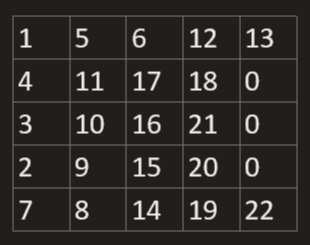

In [ ]:
## Prepare data for 3D conv

# Adding width of the segment to be 1
x_train_3D = x_train.reshape(x_train.shape[0], x_train.shape[2], 1, x_train.shape[1])
x_valid_3D = x_valid.reshape(x_valid.shape[0], x_valid.shape[2], 1, x_valid.shape[1])
x_test_3D = X_test.reshape(X_test.shape[0], X_test.shape[2], 1, X_test.shape[1])
print('Shape of training set after adding width info:',x_train_3D.shape)
print('Shape of validation set after adding width info:',x_valid_3D.shape)
print('Shape of test set after adding width info:',x_test_3D.shape)

# Reshaping the training and validation dataset for 3D conv

rearrange_index = np.array([1,5,6,12,13,4,11,17,18,23,3,10,16,21,24,2,9,15,20,25,7,8,14,19,22])
rearrange_index[:] = [i-1 for i in rearrange_index]

N,T,_,_ = x_train_3D.shape
x_train_3D = np.concatenate((x_train_3D, np.zeros((N,T,1,3))),axis=3)
x_train_3D = x_train_3D[:,:,:,rearrange_index]
x_train_3D = np.reshape(x_train_3D,(N,T,5,5)).reshape((N,5,5,T,1))
print('Shape of training set after reshape:', x_train_3D.shape)

N,T,_,_ = x_valid_3D.shape
x_valid_3D = np.concatenate((x_valid_3D, np.zeros((N,T,1,3))),axis=3)
x_valid_3D = x_valid_3D[:,:,:,rearrange_index]
x_valid_3D = np.reshape(x_valid_3D,(N,T,5,5)).reshape((N,5,5,T,1))
print('Shape of validating set after reshape:', x_valid_3D.shape)

N,T,_,_ = x_test_3D.shape
x_test_3D = np.concatenate((x_test_3D, np.zeros((N,T,1,3))),axis=3)
x_test_3D = x_test_3D[:,:,:,rearrange_index]
x_test_3D = np.reshape(x_test_3D,(N,T,5,5)).reshape((N,5,5,T,1))
print('Shape of testing set after reshape:', x_test_3D.shape)


Shape of training set after adding width info: (10243, 750, 1, 22)
Shape of validation set after adding width info: (0, 750, 1, 22)
Shape of test set after adding width info: (443, 1000, 1, 22)
Shape of training set after reshape: (10243, 5, 5, 750, 1)
Shape of validating set after reshape: (0, 5, 5, 750, 1)
Shape of testing set after reshape: (443, 5, 5, 1000, 1)


## (iv)(CNN) Defining the hyperparameters of CNN model

In [ ]:
## choose experiment mode or best model mode
experiment = False
train_from_best_weight = False
best_model_name = '3D_raw_0_750_plus_shuffle250_x4_ls02_K5_acc_7878'

save_model_weight = False

### experiment hyperparameters

In [ ]:
if experiment == True:
    
  # Model parameters

  learning_rate = 0.005
  epochs = 500
  cnn_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  dropout = 0.5
  batch_size = 128

  # Early stopping
  patience = 50
  if all_training == True:  # if all_training is true, no validation data
    monitor = 'loss'        # monitor training loss
  else:
    monitor = 'val_loss'    # monitor validation loss
  callback = tf.keras.callbacks.EarlyStopping(monitor=monitor, min_delta=0.005, patience=patience, restore_best_weights=True)

  # save model/weight option
  model_name = '3D_raw_0_750_plus_shuffle250_x4_ls2_correctedDataset_Kinf_acc_'

### best hyperparameters

In [ ]:
if experiment == False:

  # Model parameters

  learning_rate = 1e-3
  epochs = 300
  cnn_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  dropout = 0.525
  batch_size = 16

  # Early stopping
  # This callback will stop the training when there is no improvement in the loss for 30 consecutive epochs.
  callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.005, patience=30, restore_best_weights=True)

  # save model/weight option
  model_name = '3D_raw_0_750_plus_shuffle250_x4_ls02_acc_'

## (iii)(CNN) Defining the architecture of a 3D CNN model



### experiment model architechture

In [ ]:
# # Building the CNN model using sequential class

# input_shape = x_train_2D.shape[1:]
# EEG_2D_input = keras.Input(shape=input_shape, name="EEG_2D") 

# input_shape = x_train_3D.shape[1:]
# EEG_3D_input = keras.Input(shape=input_shape, name="EEG_3D") 

# # ----------------------CNN_2D_Lyayer--------------------------------
# # Conv. block 1
# CNN_2D_layer = layers.Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu')(EEG_2D_input)
# CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer1 = layers.Dropout(0.5)(CNN_2D_layer)

# # Conv. block 2
# CNN_2D_layer = layers.Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer1)
# CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer = layers.Dropout(0.5)(CNN_2D_layer)

# # Conv. block 3
# CNN_2D_layer = layers.Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer)
# CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer = layers.Dropout(0.5)(CNN_2D_layer)

# # Conv. block 4
# CNN_2D_layer = layers.Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer)
# CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer = layers.Dropout(0.5)(CNN_2D_layer)

# # Output layer with Softmax activation
# CNN_2D_layer = layers.Flatten()(CNN_2D_layer) # Flattens the input
# CNN_2D_layer = layers.Dense(4, activation='elu')(CNN_2D_layer) # Output FC layer with softmax activation

# ######################### best 3D #######################################
# # Conv. block 1
# CNN_3D_layer = layers.MaxPooling3D(pool_size=(1, 1, 4),strides=(1, 1, 4))(EEG_3D_input)
# CNN_3D_layer = layers.Conv3D(filters=32, kernel_size=(5, 5, 1), padding='same', activation='elu', strides=(1, 1, 1))(CNN_3D_layer)
# CNN_3D_layer = layers.MaxPooling3D(pool_size=(1, 1, 3),strides=(1, 1, 3))(CNN_3D_layer)
# CNN_3D_layer = layers.BatchNormalization(center=True, scale=True)(CNN_3D_layer)

# CNN_3D_layer = layers.Flatten()(CNN_3D_layer)
# CNN_3D_layer = layers.Dropout(0.5)(CNN_3D_layer)
# CNN_3D_layer = layers.Dense(4, activation='elu')(CNN_3D_layer)
# # #########################################################################

# # ----------concatenate CNN_2D_Lyayer and CNN_3D_Lyayer--------------------------------
# layers_combined = layers.concatenate([CNN_2D_layer, CNN_3D_layer])

# score = layers.Dense(4, name="MotorImageryClassScore", activation='softmax')(layers_combined)

# # Instantiate an end-to-end model predicting MotorImageryClass
# cnn_model_3D = keras.Model(inputs=[EEG_2D_input,EEG_3D_input],outputs=score)

# # Printing and Saving the model summary 
# cnn_model_3D.summary()
# from keras.utils.vis_utils import plot_model
# tf.keras.utils.plot_model(cnn_model_3D, show_shapes=True)

In [ ]:
# # Building the CNN model using sequential class

# input_shape = x_train_2D.shape[1:]
# EEG_2D_input = keras.Input(shape=input_shape, name="EEG_2D") 

# input_shape = x_train_3D.shape[1:]
# EEG_3D_input = keras.Input(shape=input_shape, name="EEG_3D") 

# # ----------------------CNN_2D_Lyayer--------------------------------
# # Conv. block 1
# CNN_2D_layer = layers.Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu')(EEG_2D_input)
# CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer1 = layers.Dropout(0.5)(CNN_2D_layer)

# # Conv. block 2
# CNN_2D_layer = layers.Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer1)
# CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer2 = layers.Dropout(0.5)(CNN_2D_layer)

# # Conv. block 3
# CNN_2D_layer = layers.Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer2)
# CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer3 = layers.Dropout(0.5)(CNN_2D_layer)

# # Conv. block 4
# CNN_2D_layer = layers.Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer3)
# CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer4 = layers.Dropout(0.5)(CNN_2D_layer)

# # Output layer with Softmax activation
# CNN_2D_layer1 = layers.Flatten()(CNN_2D_layer1) # Flattens the input
# CNN_2D_layer2 = layers.Flatten()(CNN_2D_layer2) # Flattens the input
# CNN_2D_layer3 = layers.Flatten()(CNN_2D_layer3) # Flattens the input
# CNN_2D_layer4 = layers.Flatten()(CNN_2D_layer4) # Flattens the input

# layers_combined = layers.concatenate([CNN_2D_layer1,CNN_2D_layer2,CNN_2D_layer3,CNN_2D_layer4])
# CNN_2D_layer = layers.Dense(2000, activation='elu')(CNN_2D_layer) # Output FC layer with softmax activation
# CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
# CNN_2D_layer = layers.Dropout(0.5)(layers_combined)
# CNN_2D_layer = layers.Dense(4, activation='elu')(CNN_2D_layer) # Output FC layer with softmax activation

# # ----------------------CNN_3D_Lyayer--------------------------------
# # Conv. block 1
# CNN_3D_layer = layers.MaxPooling3D(pool_size=(1, 1, 4),strides=(1, 1, 4))(EEG_3D_input)
# CNN_3D_layer = layers.Conv3D(filters=64, kernel_size=(5, 5, 5), padding='same', activation='elu', kernel_initializer='he_uniform', strides=(1, 1, 5))(CNN_3D_layer)
# CNN_3D_layer = layers.MaxPooling3D(pool_size=(1, 1, 3),strides=(1, 1, 3))(CNN_3D_layer)
# CNN_3D_layer = layers.BatchNormalization(center=True, scale=True)(CNN_3D_layer)

# # Output layer with Softmax activation
# CNN_3D_layer = layers.Flatten()(CNN_3D_layer)
# CNN_3D_layer = layers.Dropout(0.5)(CNN_3D_layer)
# CNN_3D_layer = layers.Dense(4, activation='elu')(CNN_3D_layer)

# # ----------concatenate CNN_2D_Lyayer and CNN_3D_Lyayer--------------------------------
# layers_combined = layers.concatenate([CNN_2D_layer, CNN_3D_layer])

# score = layers.Dense(4, name="MotorImageryClassScore", activation='softmax')(layers_combined)

# # Instantiate an end-to-end model predicting MotorImageryClass
# cnn_model_3D = keras.Model(inputs=[EEG_2D_input,EEG_3D_input],outputs=score)

# # Printing and Saving the model summary 
# cnn_model_3D.summary()
# from keras.utils.vis_utils import plot_model
# tf.keras.utils.plot_model(cnn_model_3D, show_shapes=True)

### Best 3D CNN Model Architecture

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 EEG_2D (InputLayer)            [(None, 750, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 750, 1, 25)   5525        ['EEG_2D[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 250, 1, 25)   0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 250, 1, 25)  100         ['max_pooling2d[0][0]']      

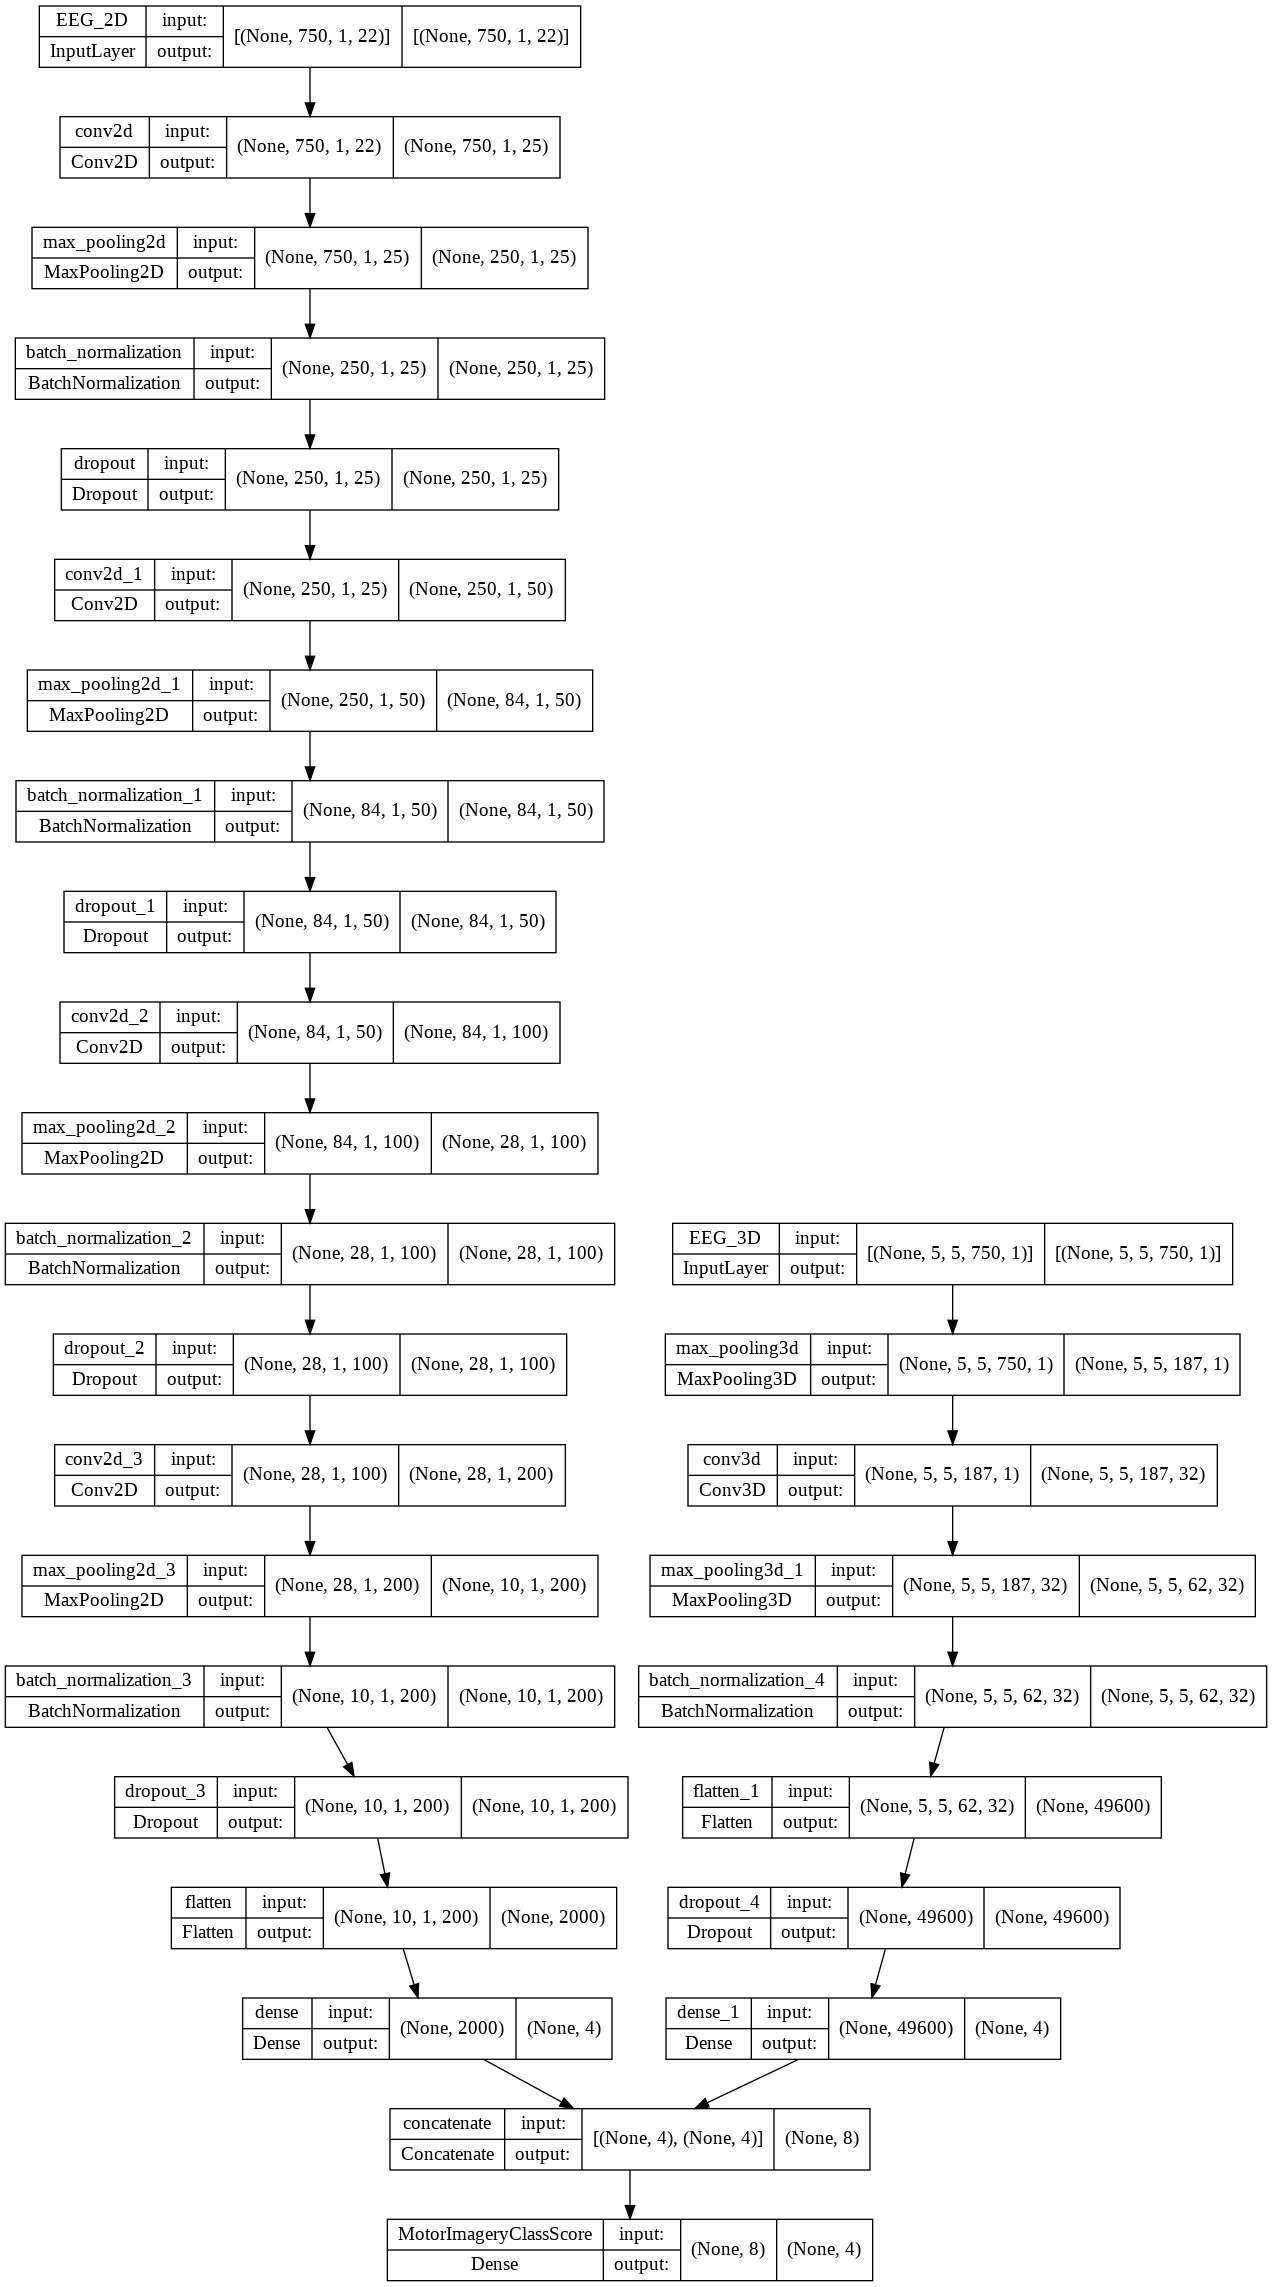

In [ ]:
# # Building the CNN model using sequential class

# Define inputs to 2D conv and 3D conv
input_shape = x_train_2D.shape[1:]
EEG_2D_input = keras.Input(shape=input_shape, name="EEG_2D") 

input_shape = x_train_3D.shape[1:]
EEG_3D_input = keras.Input(shape=input_shape, name="EEG_3D") 

# ----------------------CNN_2D_Lyayer--------------------------------
# Conv. block 1
CNN_2D_layer = layers.Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu')(EEG_2D_input)
CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
CNN_2D_layer = layers.Dropout(dropout)(CNN_2D_layer)

# Conv. block 2
CNN_2D_layer = layers.Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer)
CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
CNN_2D_layer = layers.Dropout(dropout)(CNN_2D_layer)

# Conv. block 3
CNN_2D_layer = layers.Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer)
CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
CNN_2D_layer = layers.Dropout(dropout)(CNN_2D_layer)

# Conv. block 4
CNN_2D_layer = layers.Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu')(CNN_2D_layer)
CNN_2D_layer = layers.MaxPooling2D(pool_size=(3,1), padding='same')(CNN_2D_layer)
CNN_2D_layer = layers.BatchNormalization()(CNN_2D_layer)
CNN_2D_layer = layers.Dropout(dropout)(CNN_2D_layer)

# Output layer with Softmax activation
CNN_2D_layer = layers.Flatten()(CNN_2D_layer) # Flattens the input
CNN_2D_layer = layers.Dense(4, activation='elu')(CNN_2D_layer) # Output FC layer with softmax activation

# ----------------------CNN_3D_Lyayer--------------------------------
# Conv. block 1
CNN_3D_layer = layers.MaxPooling3D(pool_size=(1, 1, 4),strides=(1, 1, 4))(EEG_3D_input)
CNN_3D_layer = layers.Conv3D(filters=32, kernel_size=(5, 5, 5), padding='same', activation='elu', kernel_initializer='he_uniform', strides=(1, 1, 1))(CNN_3D_layer)
CNN_3D_layer = layers.MaxPooling3D(pool_size=(1, 1, 3),strides=(1, 1, 3))(CNN_3D_layer)
CNN_3D_layer = layers.BatchNormalization(center=True, scale=True)(CNN_3D_layer)

# Output layer with Softmax activation
CNN_3D_layer = layers.Flatten()(CNN_3D_layer)
CNN_3D_layer = layers.Dropout(dropout)(CNN_3D_layer)
CNN_3D_layer = layers.Dense(4, activation='elu')(CNN_3D_layer)

# ----------concatenate CNN_2D_Lyayer and CNN_3D_Lyayer--------------------------------
layers_combined = layers.concatenate([CNN_2D_layer, CNN_3D_layer])

score = layers.Dense(4, name="MotorImageryClassScore", activation='softmax')(layers_combined)

# Instantiate an end-to-end model predicting MotorImageryClass
cnn_model_3D = keras.Model(inputs=[EEG_2D_input,EEG_3D_input],outputs=score)

# Printing and Saving the model summary 
cnn_model_3D.summary()
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(cnn_model_3D, show_shapes=True)

## (v)(CNN) Compiling, training and validating the model

In [ ]:
# Compiling the model
cnn_model_3D.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

if train_from_best_weight == True:
  # load weights from best model
  best_model_dir = directory + 'saved_model/' + best_model_name
  best_weight_dir = directory + 'saved_weight/' + best_model_name
  best_weights = cnn_model_3D.load_weights(best_model_dir)

# Training and validating the model
cnn_model_3D_results = cnn_model_3D.fit(
             {"EEG_2D": x_train_2D, "EEG_3D": x_train_3D},
             y_train,
             batch_size=batch_size,
             epochs=epochs,
             validation_data=({"EEG_2D": x_valid_2D, "EEG_3D": x_valid_3D}, y_valid), 
             callbacks=[callback],
             verbose=True)


Epoch 1/300
641/641 [==============================] - 16s 9ms/step - loss: 1.4811 - accuracy: 0.3019
Epoch 2/300
641/641 [==============================] - 6s 9ms/step - loss: 1.3227 - accuracy: 0.3925
Epoch 3/300
641/641 [==============================] - 5s 8ms/step - loss: 1.2766 - accuracy: 0.4771
Epoch 4/300
641/641 [==============================] - 5s 8ms/step - loss: 1.2169 - accuracy: 0.5405
Epoch 5/300
641/641 [==============================] - 5s 8ms/step - loss: 1.1845 - accuracy: 0.5740
Epoch 6/300
641/641 [==============================] - 5s 8ms/step - loss: 1.1656 - accuracy: 0.5967
Epoch 7/300
641/641 [==============================] - 5s 8ms/step - loss: 1.1538 - accuracy: 0.6077
Epoch 8/300
641/641 [==============================] - 5s 9ms/step - loss: 1.1388 - accuracy: 0.6152
Epoch 9/300
641/641 [==============================] - 5s 8ms/step - loss: 1.1321 - accuracy: 0.6244
Epoch 10/300
641/641 [==============================] - 5s 8ms/step - loss: 1.1241 - accur

## (vi)(CNN) Visualizing the accuracy and loss trajectory

KeyError: ignored

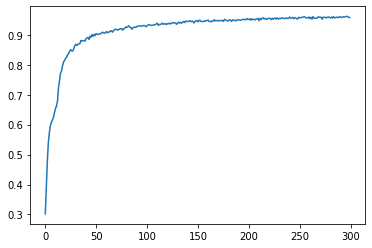

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(cnn_model_3D_results.history['accuracy'])
plt.plot(cnn_model_3D_results.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(cnn_model_3D_results.history['loss'],'o')
plt.plot(cnn_model_3D_results.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## (vii)(CNN) Performance

### Accuracy

In [ ]:
## Testing the basic CNN model

cnn_score = cnn_model_3D.evaluate({"EEG_2D": x_test_2D[:,0:len_t,:,:], "EEG_3D": x_test_3D[:,:,:,0:len_t,:]}, y_test, verbose=0)
print('Test accuracy of the CNN model:',cnn_score[1])
print('Test accuracy in Cohen Kappa statistic:',(cnn_score[1]-0.25)/0.75)

Test accuracy of the CNN model: 0.772009015083313
Test accuracy in Cohen Kappa statistic: 0.696012020111084


### Confusion Matrix

In [ ]:
## create confusion matrix

y_pred = cnn_model_3D.predict({"EEG_2D": x_test_2D[:,0:len_t,:,:], "EEG_3D": x_test_3D[:,:,:,0:len_t,:]})
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
labels=[0, 1, 2, 3]
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true')
plt.show()

### Save the model/weight

In [ ]:
# save_model_weight = True
# model_name = '3D_raw_0_750_plus_shuffle250_x4_ls02_K5_acc_7878'

if save_model_weight == True:
  model_dir = directory + 'saved_model/' + model_name
  weight_dir = directory + 'aved_weight/' + model_name

  # save the model
  cnn_model_3D.save(model_dir) 

  # load the model
  new_model = tf.keras.models.load_model(model_dir)

  # Save the weights
  cnn_model_3D.save_weights(weight_dir)

  # Restore the weights
  cnn_model_3D.load_weights(weight_dir)

  # Printing and Saving the model summary 
  cnn_model_3D.summary()
  fig_name = model_name + '.png'
  saved_image_dir = directory + 'saved_image/'+fig_name
  from keras.utils.vis_utils import plot_model
  tf.keras.utils.plot_model(cnn_model_3D, saved_image_dir, show_shapes=True)

save_aug_data = False
if save_aug_data == True:  
  # save the augmented data the model was trained on
  np.save(directory + 'X_train_valid_new.npy', X_train_valid_new)
  np.save(directory + 'y_train_valid_new.npy', y_train_valid_new)
  np.save(directory + 'Xcase1.npy', Xcase1)
  np.save(directory + 'Ycase1.npy', Ycase1)
  np.save(directory + 'ind_train.npy', ind_train)
  np.save(directory + 'ind_valid.npy', ind_valid)

In [ ]:
names = [weight.name for layer in cnn_model_3D.layers for weight in layer.weights]
weights = cnn_model_3D.get_weights()

for name, weight in zip(names, weights):
    print(name, weight.shape)

In [ ]:
## visualize the weights of the 1st layer 3D filter 
from matplotlib.pyplot import figure
check_weight = weights[names.index('conv3d_2/kernel:0')]
check_bias = weights[names.index('conv3d_2/bias:0')]
filters = check_weight+check_bias
print(filters.shape)
W,H,T,C,F = filters.shape
i = 6
for f in np.arange(F):
  i-=5
  for t in np.arange(T):
    plt.subplot(1,T,i)
    plt.axis('off')
    plt.imshow(filters[:,:,t,0,f])
    plt.axis('off')
    i+=1
  plt.axis('off')
  plt.show()

In [ ]:
## visualize the weights of the last combined dense layer 3D 
check_weight = weights[names.index('MotorImageryClassScore/kernel:0')]
check_bias = weights[names.index('MotorImageryClassScore/bias:0')]
print(check_weight+check_bias)
plt.plot(check_weight+check_bias)
plt.grid()
plt.show()

# (Viii) Best CNN model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 EEG_2D (InputLayer)            [(None, 750, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 750, 1, 25)   5525        ['EEG_2D[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 250, 1, 25)   0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 250, 1, 25)  100         ['max_pooling2d[0][0]']      

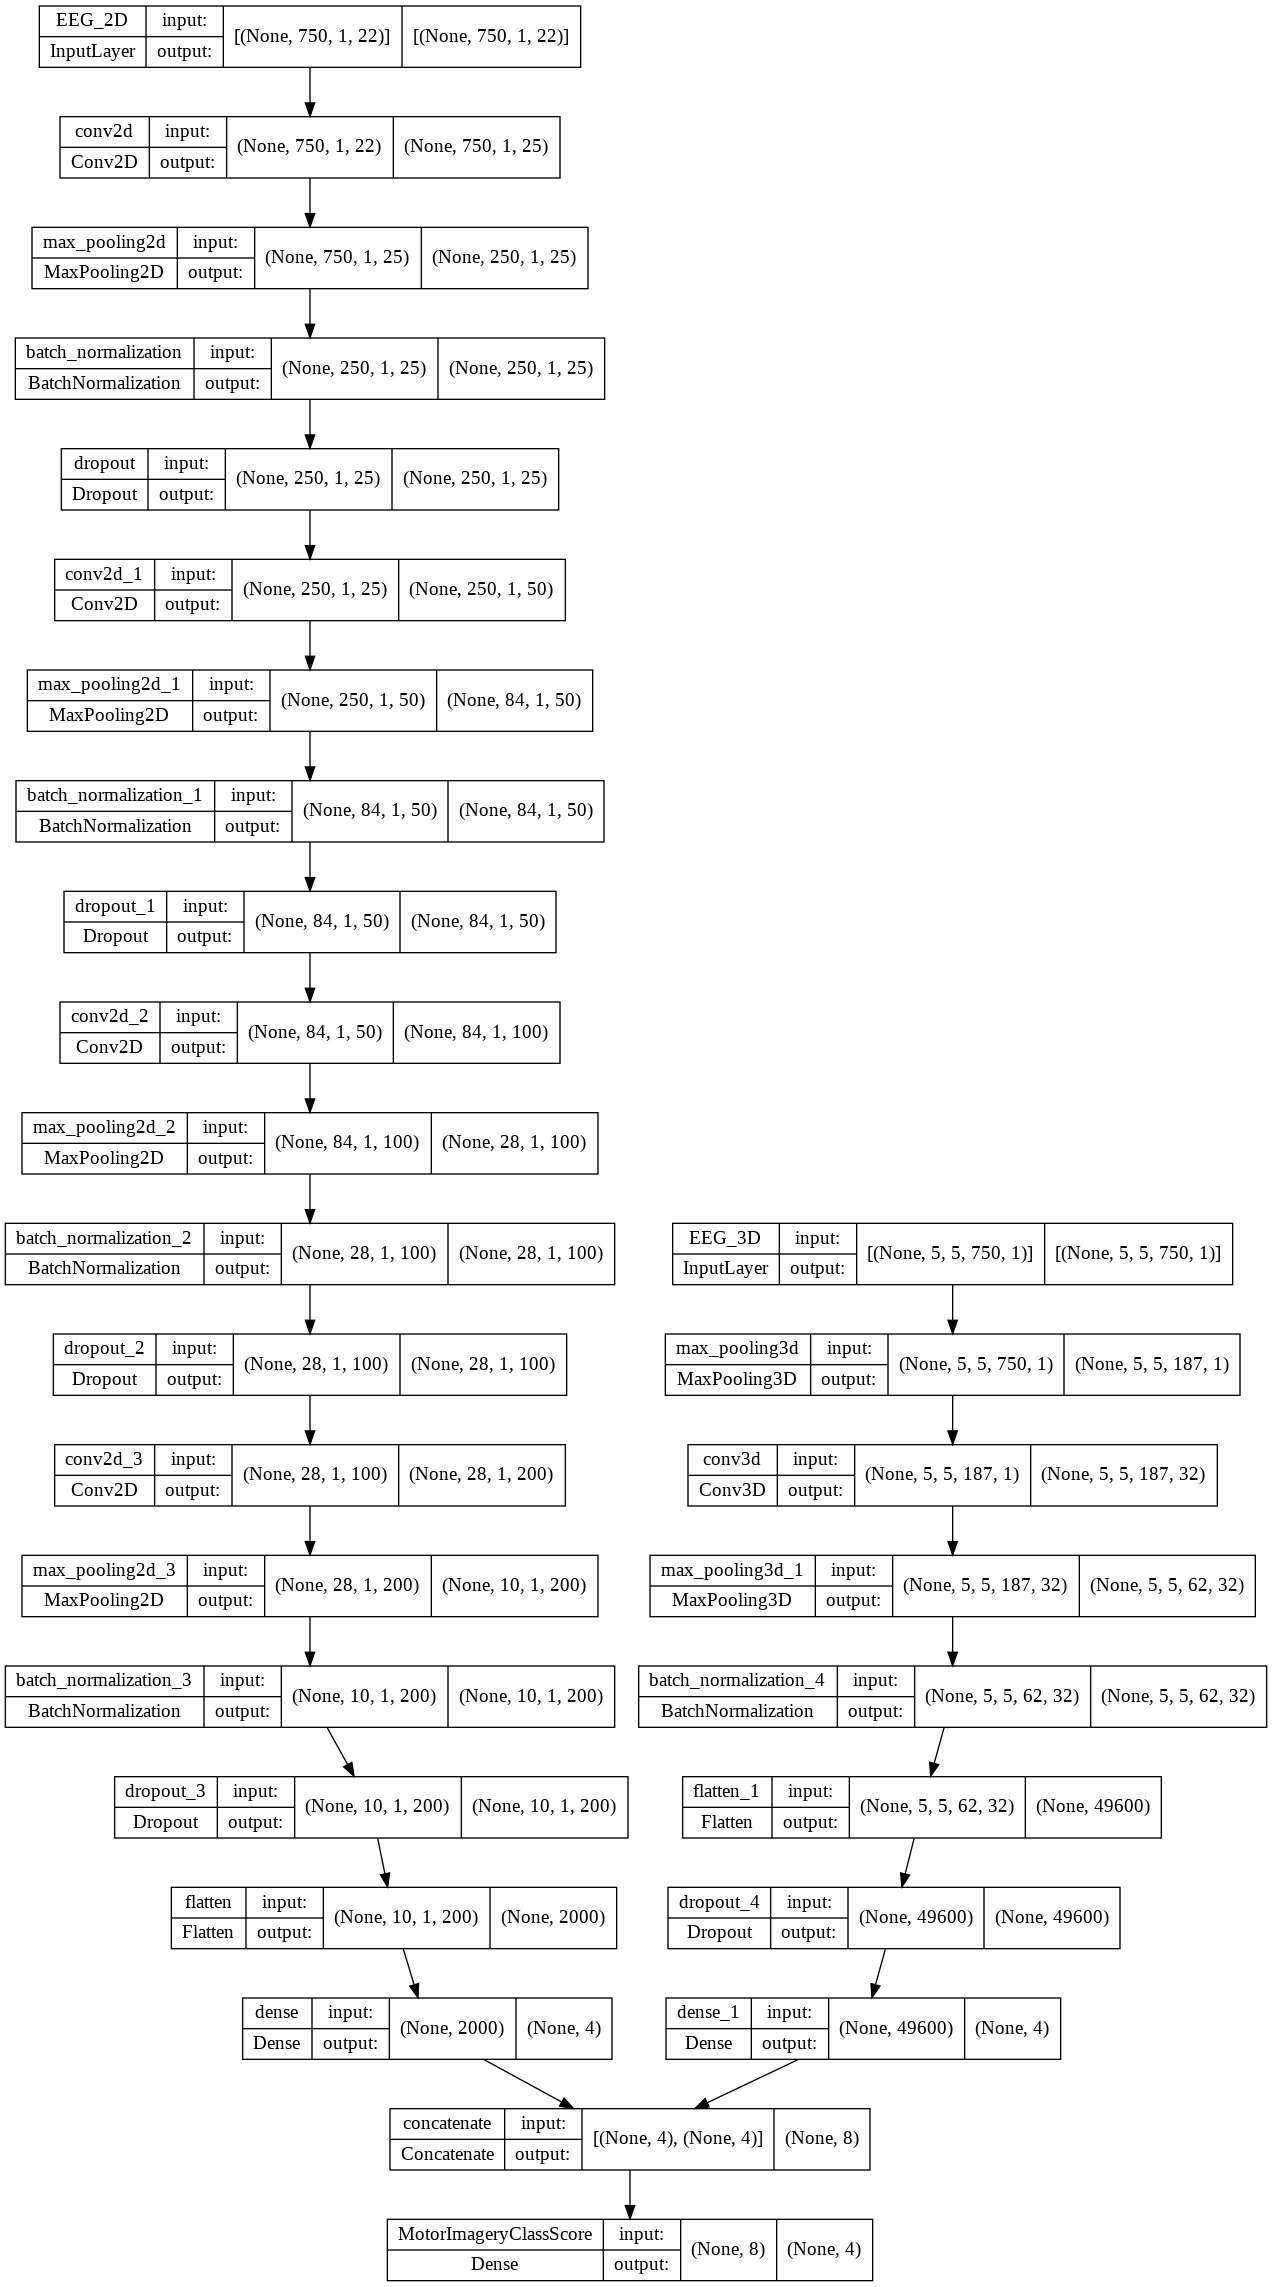

In [ ]:
# load the best model

model_name = '3D_raw_0_750_plus_shuffle250_x4_ls02_K5_acc_7878'
model_dir = directory + 'saved_model/' + model_name
weight_dir = directory + 'saved_weight/' + model_name
best_model = tf.keras.models.load_model(model_dir)

# Printing the model summary 
best_model.summary()
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(best_model, show_shapes=True) 

In [ ]:
## Report the accuracy on the best model
cnn_score = best_model.evaluate({"EEG_2D": x_test_2D[:,0:len_t,:,:], "EEG_3D": x_test_3D[:,:,:,0:len_t,:]}, y_test, verbose=0)
print('Test accuracy of the CNN model:',cnn_score[1])
print('Test accuracy in Cohen Kappa statistic:',(cnn_score[1]-0.25)/0.75)

NameError: ignored

In [ ]:
## create confusion matrix
y_pred = best_model.predict({"EEG_2D": x_test_2D[:,0:len_t,:,:], "EEG_3D": x_test_3D[:,:,:,0:len_t,:]})
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
labels=[0, 1, 2, 3]
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true')
plt.show()

In [ ]:
## load the weights
names = [weight.name for layer in best_model.layers for weight in layer.weights]
weights = best_model.get_weights()

for name, weight in zip(names, weights):
    print(name, weight.shape)

conv2d/kernel:0 (10, 1, 22, 25)
conv2d/bias:0 (25,)
batch_normalization/gamma:0 (25,)
batch_normalization/beta:0 (25,)
batch_normalization/moving_mean:0 (25,)
batch_normalization/moving_variance:0 (25,)
conv2d_1/kernel:0 (10, 1, 25, 50)
conv2d_1/bias:0 (50,)
batch_normalization_1/gamma:0 (50,)
batch_normalization_1/beta:0 (50,)
batch_normalization_1/moving_mean:0 (50,)
batch_normalization_1/moving_variance:0 (50,)
conv2d_2/kernel:0 (10, 1, 50, 100)
conv2d_2/bias:0 (100,)
batch_normalization_2/gamma:0 (100,)
batch_normalization_2/beta:0 (100,)
batch_normalization_2/moving_mean:0 (100,)
batch_normalization_2/moving_variance:0 (100,)
conv2d_3/kernel:0 (10, 1, 100, 200)
conv2d_3/bias:0 (200,)
conv3d/kernel:0 (5, 5, 5, 1, 32)
conv3d/bias:0 (32,)
batch_normalization_3/gamma:0 (200,)
batch_normalization_3/beta:0 (200,)
batch_normalization_3/moving_mean:0 (200,)
batch_normalization_3/moving_variance:0 (200,)
batch_normalization_4/gamma:0 (32,)
batch_normalization_4/beta:0 (32,)
batch_normaliza

(5, 5, 5, 1, 32)


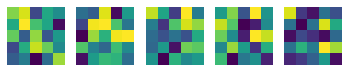

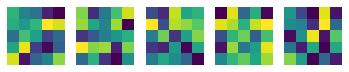

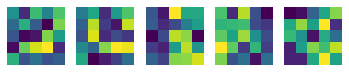

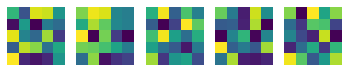

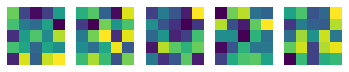

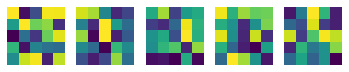

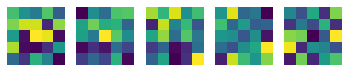

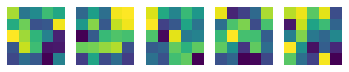

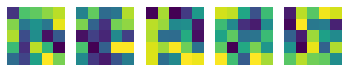

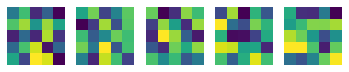

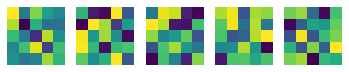

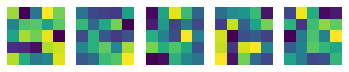

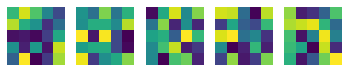

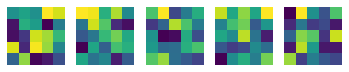

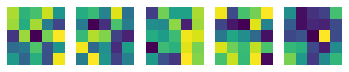

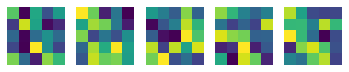

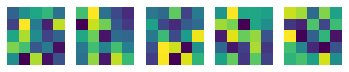

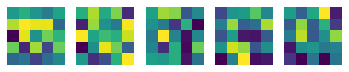

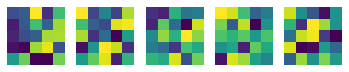

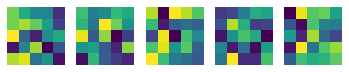

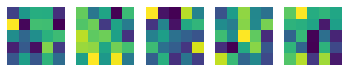

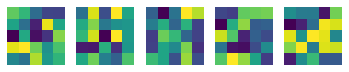

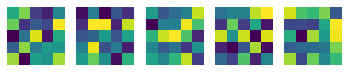

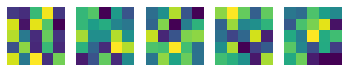

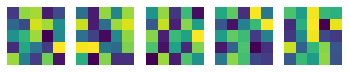

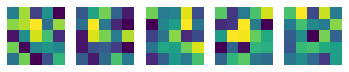

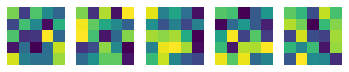

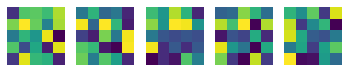

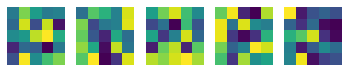

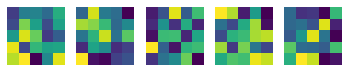

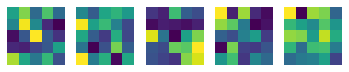

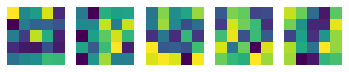

In [ ]:
## visualize the weights of the 1st layer 3D filter 
from matplotlib.pyplot import figure
check_weight = weights[names.index('conv3d/kernel:0')]
check_bias = weights[names.index('conv3d/bias:0')]
filters = check_weight+check_bias
print(filters.shape)
W,H,T,C,F = filters.shape
i = 6
for f in np.arange(F):
  i-=5
  for t in np.arange(T):
    plt.subplot(1,T,i)
    plt.axis('off')
    plt.imshow(filters[:,:,t,0,f])
    plt.axis('off')
    i+=1
  plt.axis('off')
  plt.show()

(10, 1, 22, 25)


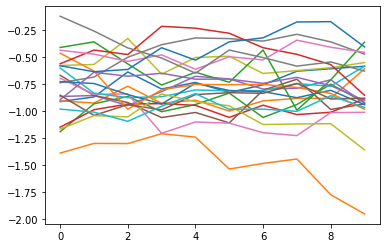

In [ ]:
## visualize the weights of the 1st layer 2D filter 
from matplotlib.pyplot import figure
check_weight = weights[names.index('conv2d/kernel:0')]
check_bias = weights[names.index('conv2d/bias:0')]
filters = check_weight+check_bias
print(filters.shape)
W,T,C,F = filters.shape
for f in np.arange(C):
  plt.plot(filters[:,:,f,0])
plt.show()
